In [1]:
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

warnings.filterwarnings("ignore")

#depdelay=ritardo partenza
#arrdelay con depdelay


In [3]:
data=pd.read_csv('dataset/finalePython.csv')
data=data.drop('countrydest',axis=1)
data=data.drop('dayofweek',axis=1)
data=data.drop('weekofmonth',axis=1)
data=data.drop('month',axis=1)
data=data.drop('day',axis=1)
data=data.drop('partofdayarr',axis=1)
data=data.drop('partofdaydep',axis=1)
data=data.drop(['countryorig','airportdest'],axis=1)
data=data.drop(['airportorig','airline','statenamedest','regiondest','statenameorig','regionorig'],axis=1)
#data['partofdaydep']=data['partofdaydep'].apply(lambda x: 1 if x=='PM' else 0)
#data['partofdayarr']=data['partofdayarr'].apply(lambda x: 1 if x=='PM' else 0)
#aggiungere lambda function con fasce di ritardo totale

In [4]:
#data=data.drop('day',axis=1)
#data=data.drop('month',axis=1)
#data=data.drop('taxiIn',axis=1)
#data=data.drop('month',axis=1)

In [5]:
data=data.drop('flightnum',axis=1)
data=data.drop('tailnumid',axis=1)
#data=data.drop('taxiIn',axis=1)
#data=data.drop('taxiOut',axis=1)

Text(0, 0.5, 'Count')

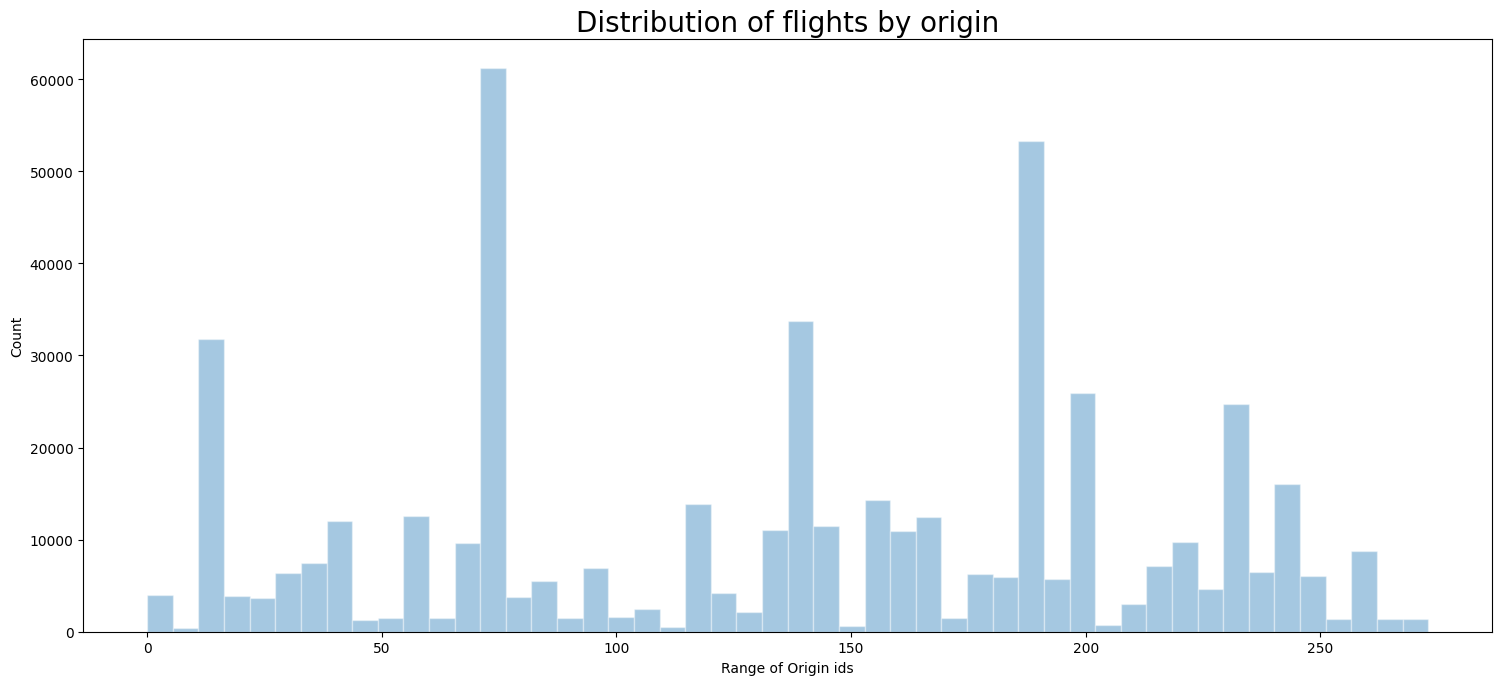

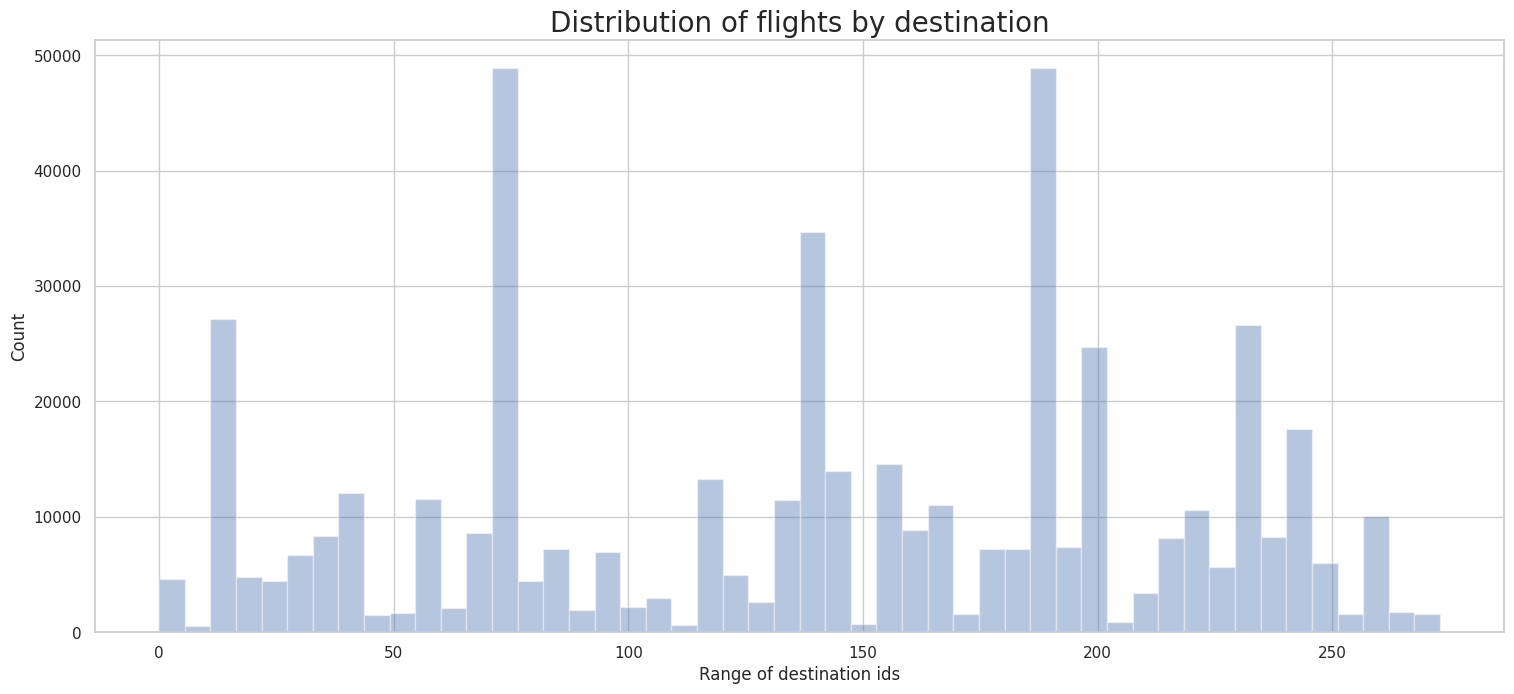

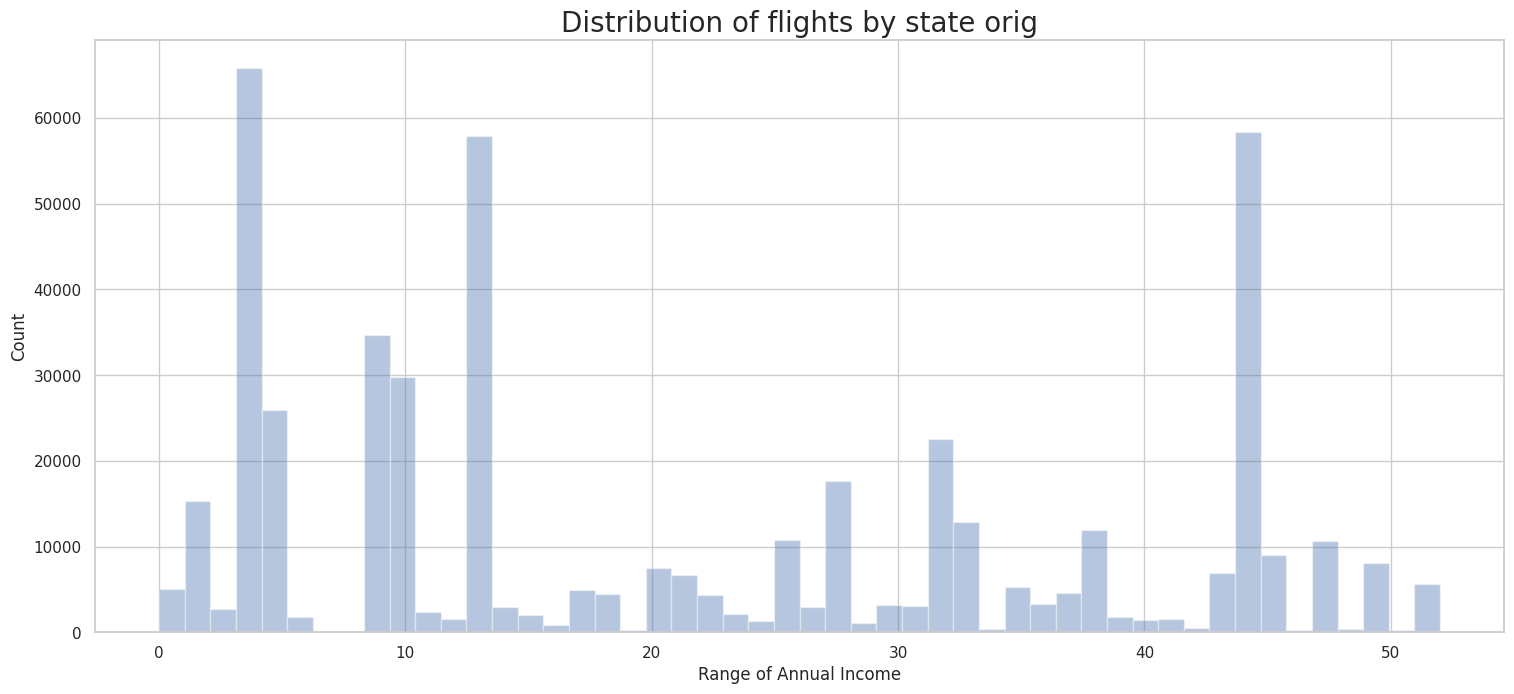

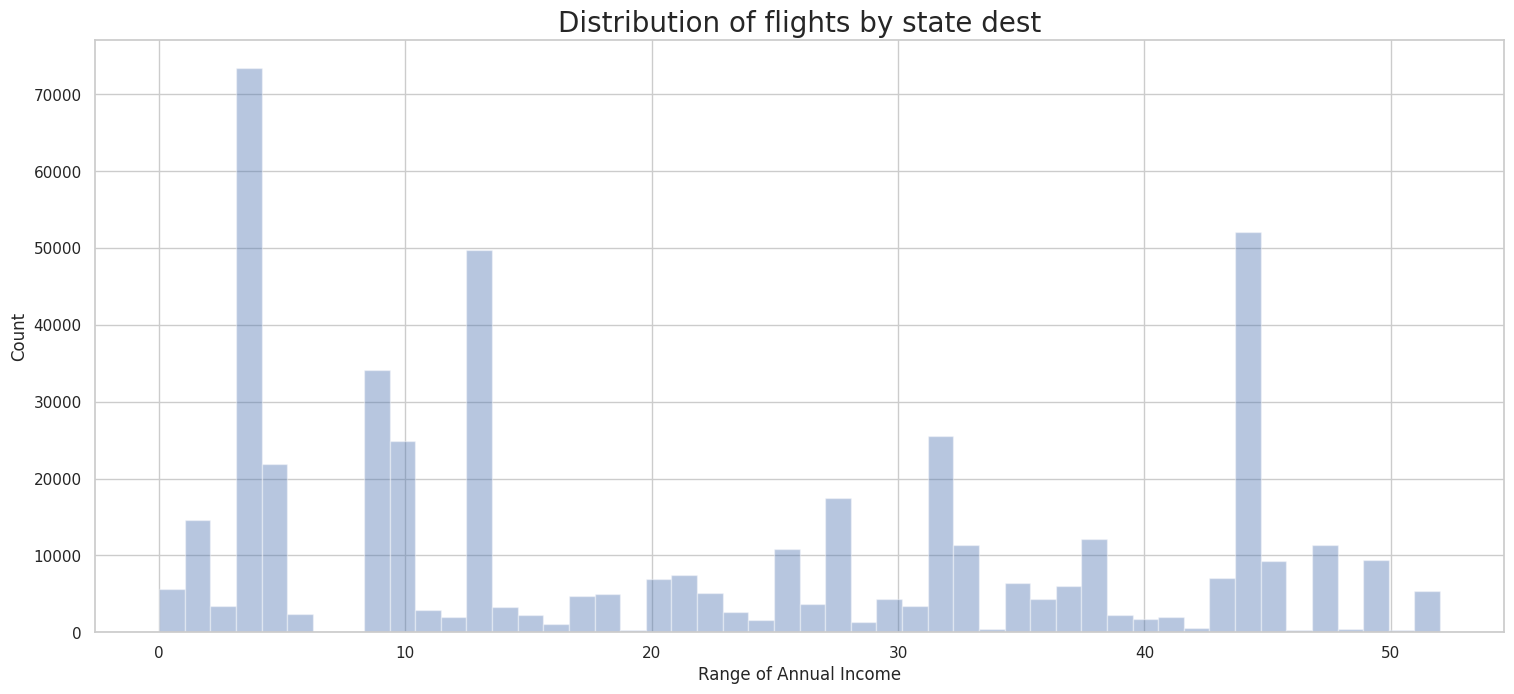

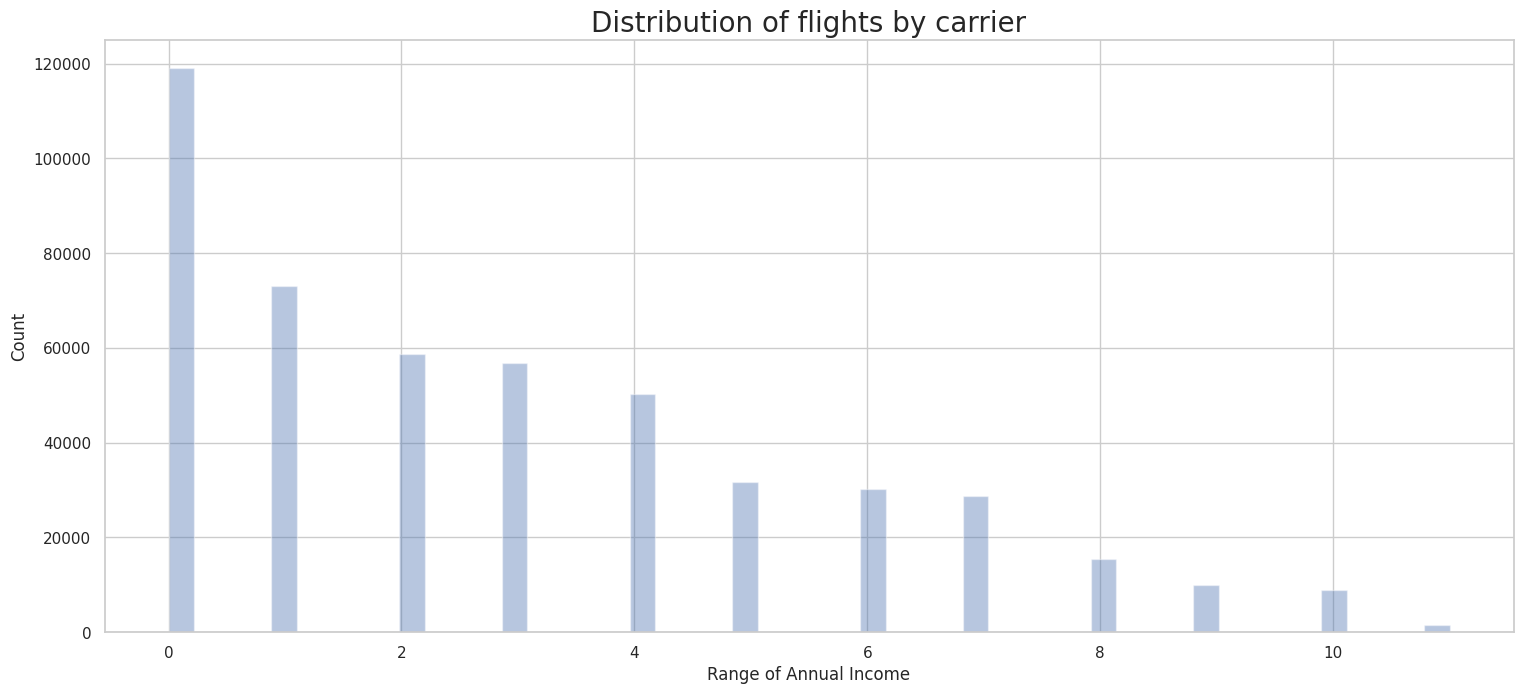

In [6]:
plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['iataorigid'], kde=False)
plt.title('Distribution of flights by origin', fontsize = 20)
plt.xlabel('Range of Origin ids')
plt.ylabel('Count')


plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['iatadestid'], kde=False)
plt.title('Distribution of flights by destination', fontsize = 20)
plt.xlabel('Range of destination ids')
plt.ylabel('Count')


plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['statecodeorigid'], kde=False)
plt.title('Distribution of flights by state orig', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['statecodedestid'], kde=False)
plt.title('Distribution of flights by state dest', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.figure(figsize=(40,100))
plt.subplot(11, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['uniquecarrierid'], kde=False)
plt.title('Distribution of flights by carrier', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')



### Analisi dei ritardi


### Analisi per compagnia(carrier)

In [7]:
ritardi=data[(data['carrierdelay']>0) | (data['weatherdelay']>0) | (data['nasdelay']>0) | (data['securitydelay']>0) | (data['lateaircraftdelay']>0)]
ritardi['totaldelay']=np.nan
for index,row in ritardi.iterrows():
  ritardi.at[index,'totaldelay']=row['carrierdelay']+row['weatherdelay']+row['nasdelay']+row['securitydelay']+row['lateaircraftdelay']

ritardi.head()


deptime  airtime  crsarrtime  actualelapsedtime  crselapsedtime  depdelay  \
0     1829       77        1925                 90              90        34   
1     1937      230        1940                240             250        67   
2     1644      107        1725                121             135        94   
3     1452      213        1625                228             240        27   
4     1323      110        1510                123             135        28   

   iataorigid  iatadestid  distance  taxiIn  ...  carrierdelay  weatherdelay  \
0         125          42       515       3  ...             2             0   
1         125         138      1591       3  ...            10             0   
2         125         158       828       6  ...             8             0   
3         125         199      1489       7  ...             3             0   
4         125         257       838       4  ...             0             0   

   nasdelay  securitydelay  lateaircraftdelay  statecodeorigid  \
0         0              0                 32               14   
1         0              0                 47               14   
2         0              0                 72               14   
3         0              0                 12               14   
4         0              0                 16               14   

   statecodedestid  uniquecarrierid  arrdelay  totaldelay  
0               20                0        34        34.0  
1               28                0        57        57.0  
2                9                0        80        80.0  
3                2                0        15        15.0  
4                9                0        16        16.0  

[5 rows x 21 columns]

In [8]:
# for col in data.columns:
#   print(col)

# print(len(data.columns))

deptime
airtime
crsarrtime
actualelapsedtime
crselapsedtime
depdelay
iataorigid
iatadestid
distance
taxiIn
taxiOut
carrierdelay
weatherdelay
nasdelay
securitydelay
lateaircraftdelay
statecodeorigid
statecodedestid
uniquecarrierid
arrdelay
20


In [9]:
print(data.columns)

Index(['deptime', 'airtime', 'crsarrtime', 'actualelapsedtime',
       'crselapsedtime', 'depdelay', 'iataorigid', 'iatadestid', 'distance',
       'taxiIn', 'taxiOut', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay', 'statecodeorigid',
       'statecodedestid', 'uniquecarrierid', 'arrdelay'],
      dtype='object')


In [24]:
pairplot=data.drop(['statecodedestid','uniquecarrierid','statecodeorigid','iatadestid','iataorigid'],axis=1)
data=data.drop(['statecodedestid','uniquecarrierid','statecodeorigid','iatadestid','iataorigid'],axis=1)


KeyError: "['statecodedestid', 'uniquecarrierid', 'statecodeorigid', 'iatadestid', 'iataorigid'] not found in axis"

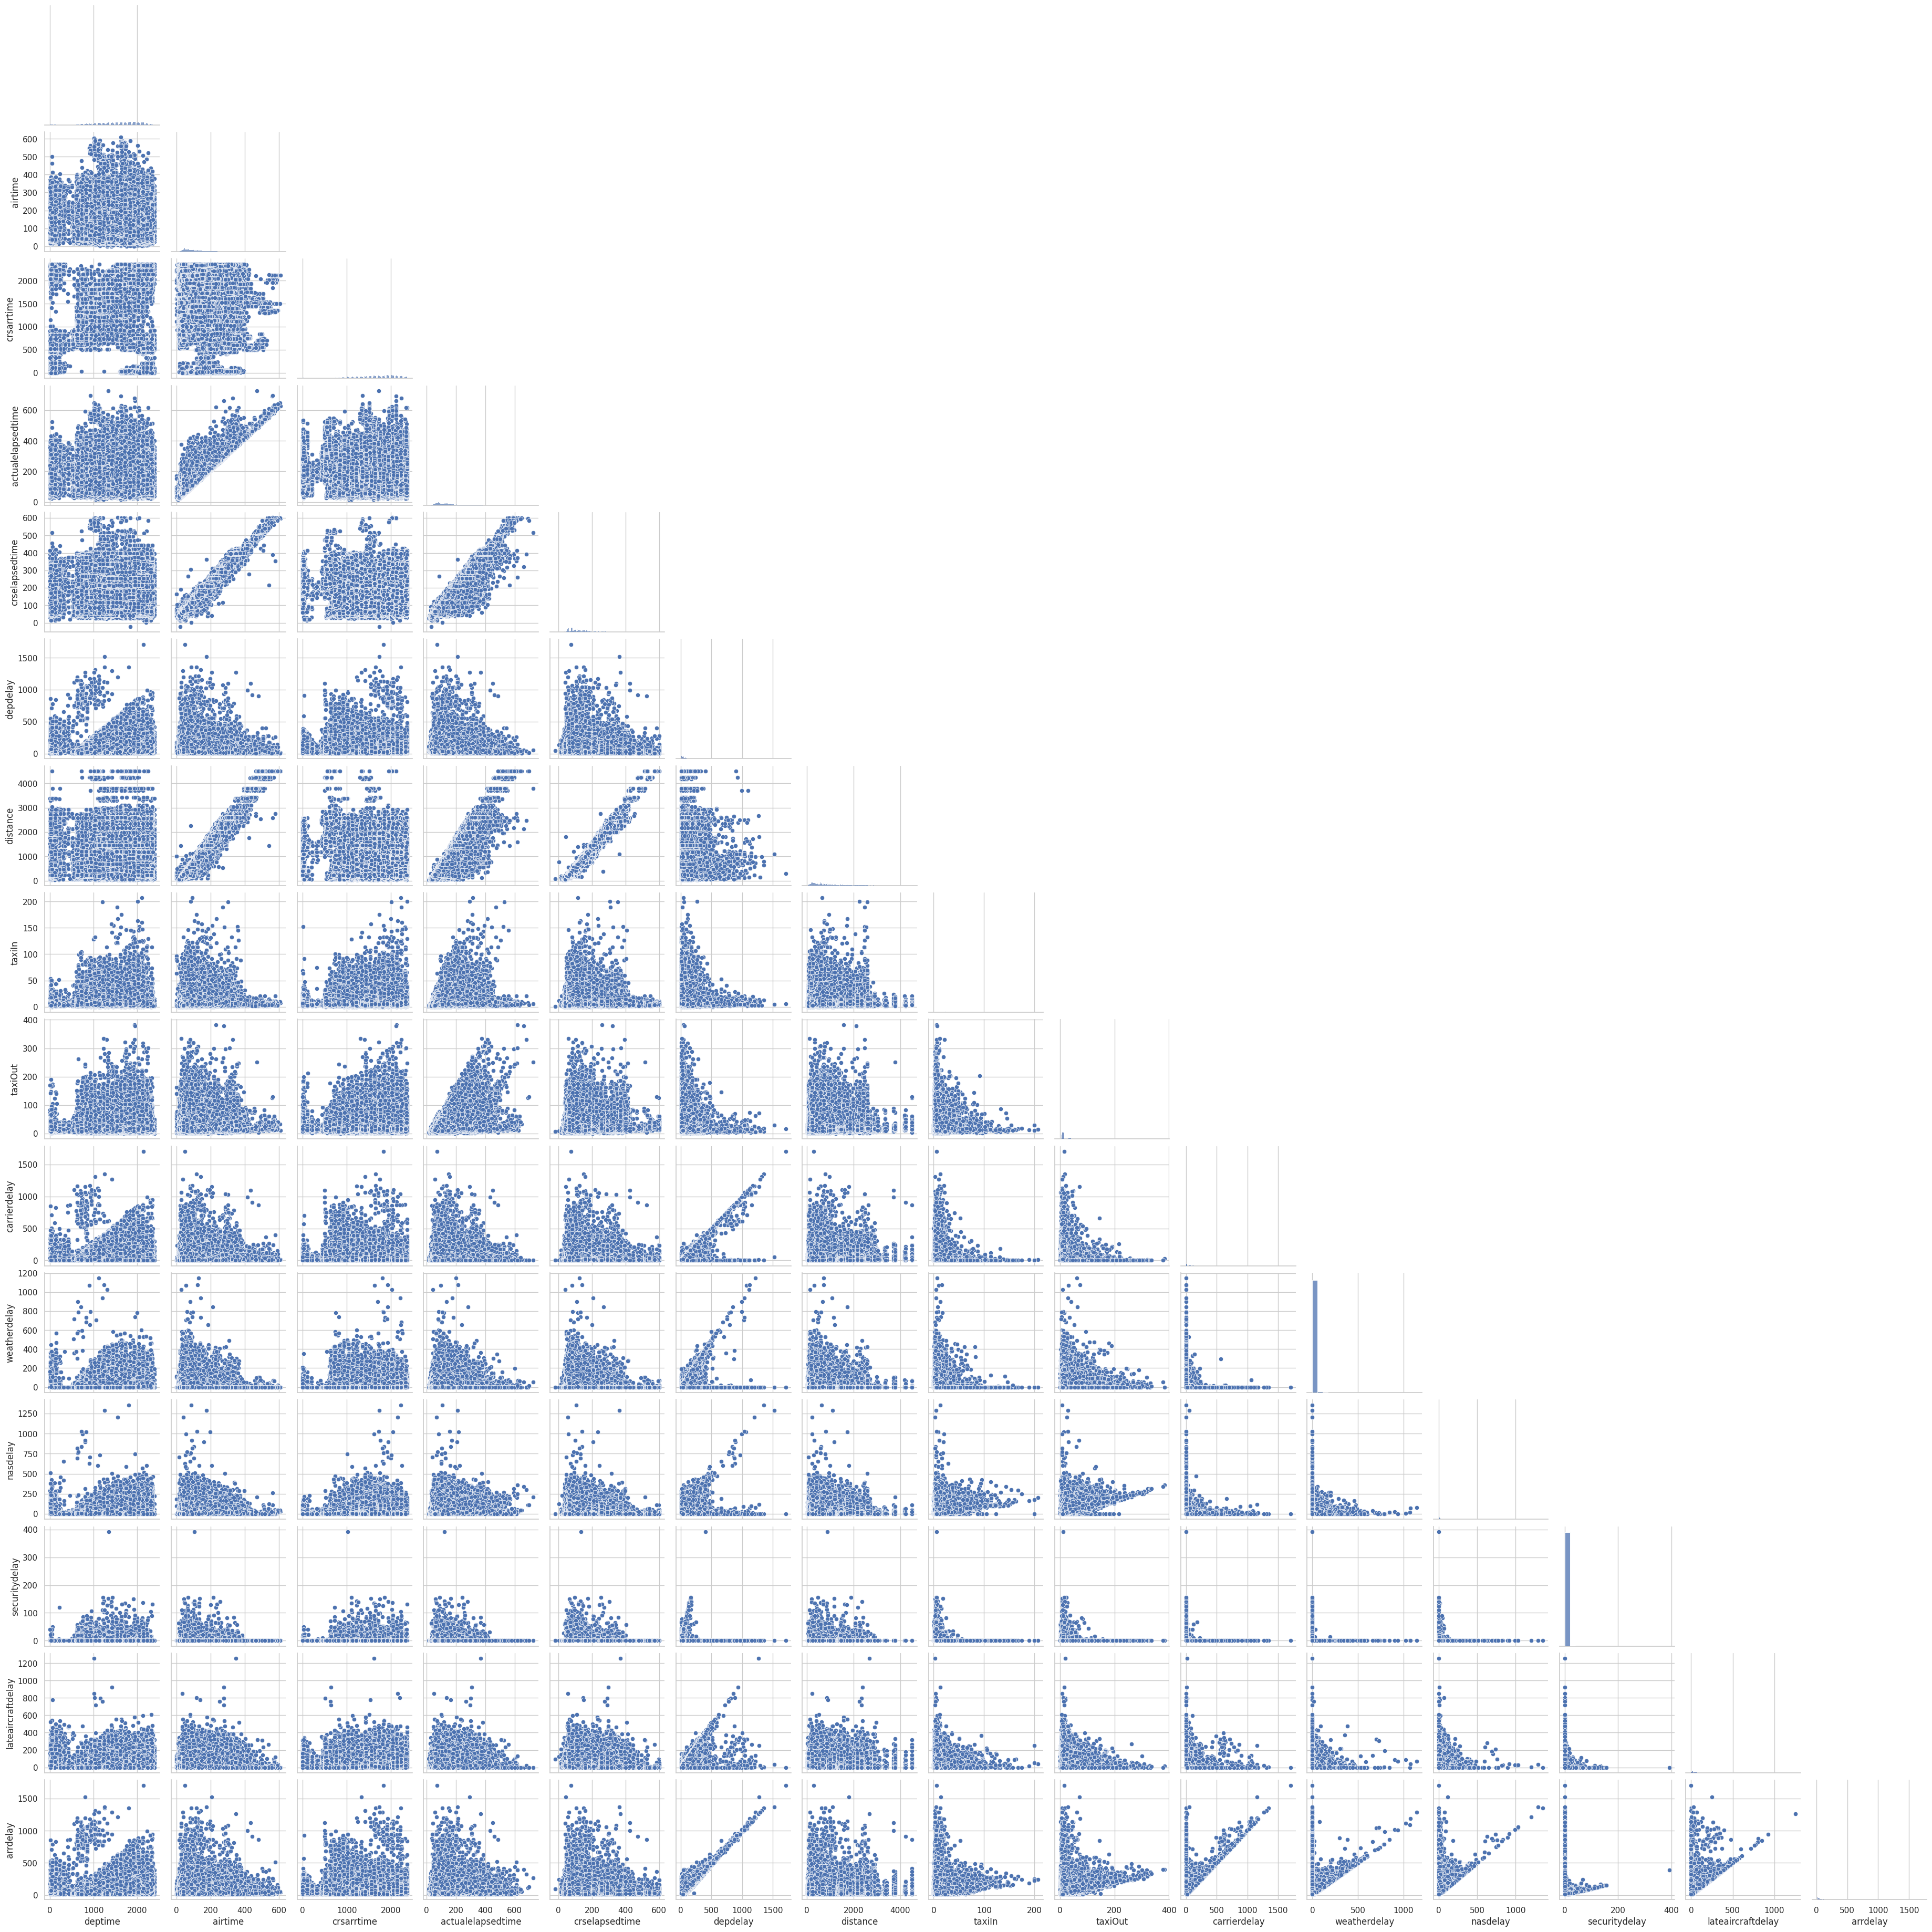

In [11]:
sns.pairplot(pairplot,corner=True)

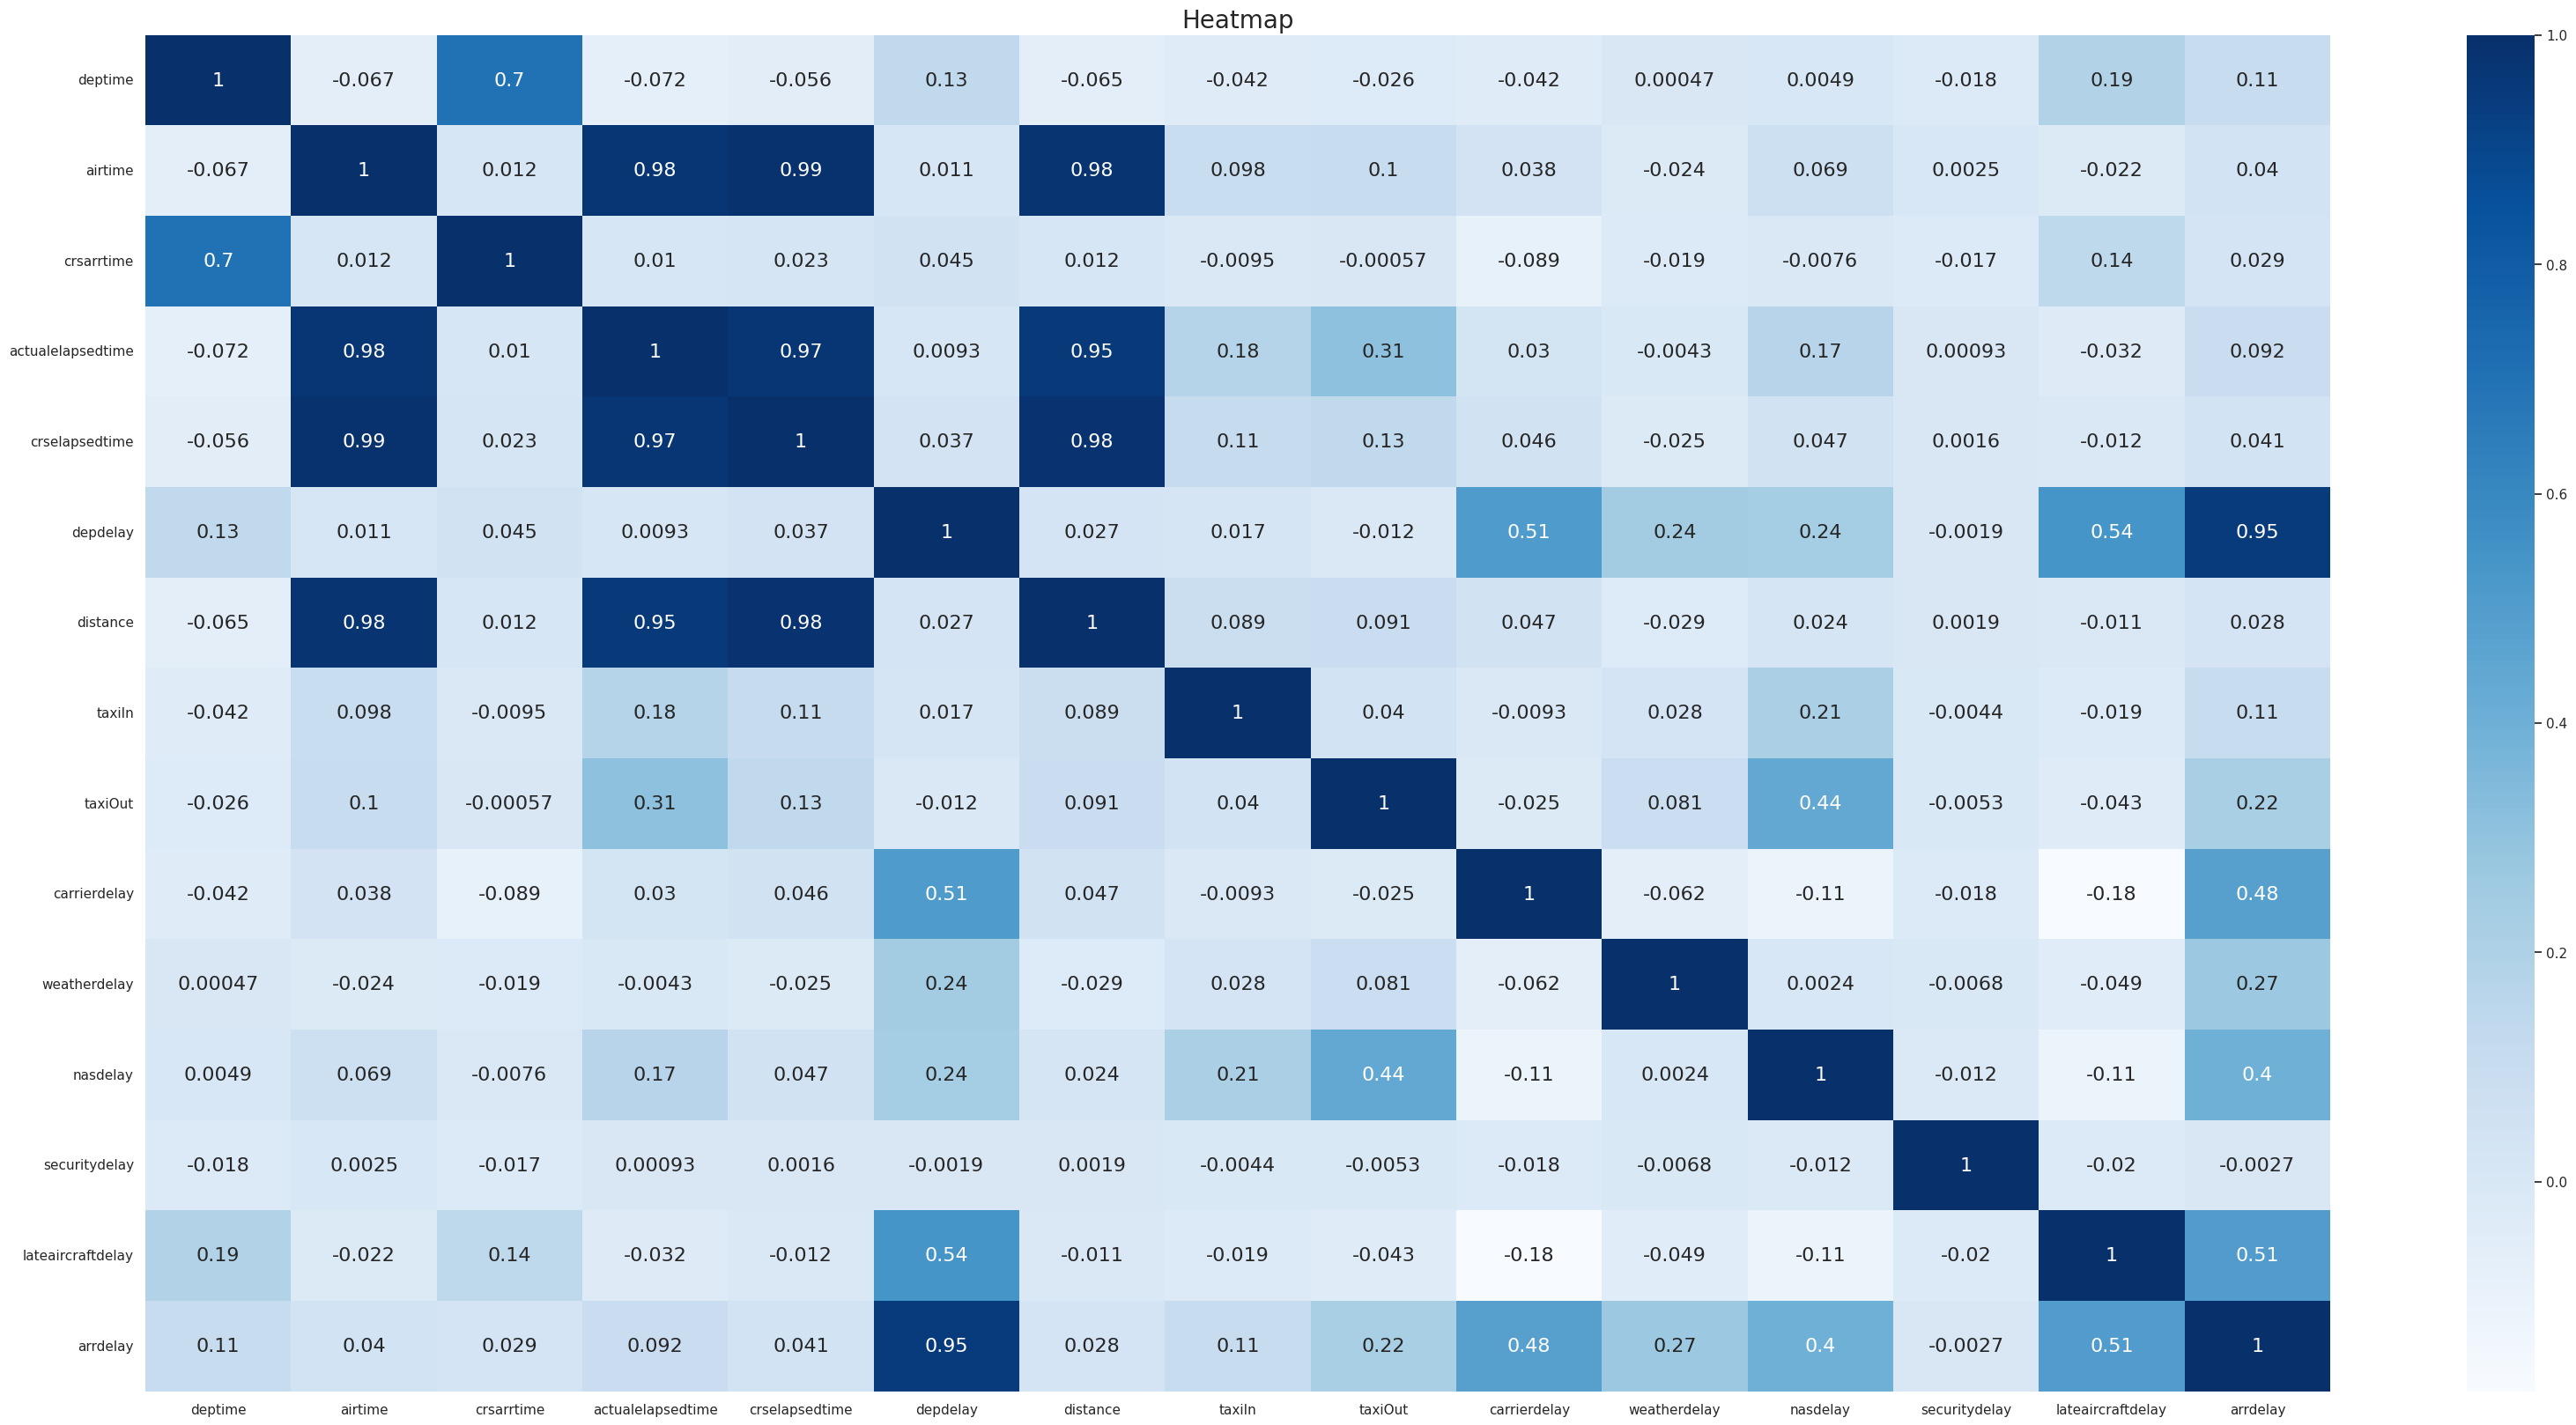

In [25]:
plt.figure(figsize=(40,20))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

In [31]:
ritardi_senza_zero=data
print(len(ritardi_senza_zero))
# zero = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==0]
# one = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==1]
# two = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==2]
# three = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==3]
# four = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==4]
# five = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==5]
# six = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==6]
# seven = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==7]
# eight = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==8]
# nine = ritardi_senza_zero[ritardi_senza_zero['uniquecarrierid']==9]
#balanced_data = pd.concat([nine, zero.sample(len(nine)), one.sample(len(nine)), two.sample(len(nine)), three.sample(len(nine)), four.sample(len(nine)), five.sample(len(nine)), six.sample(len(nine)), seven.sample(len(nine)), eight.sample(len(nine)), nine.sample(len(nine))])
balanced_data=data
#print(one.shape,two.shape,three.shape,four.shape,five.shape,six.shape,seven.shape,eight.shape,nine.shape)
print(balanced_data.shape)

484551
(484551, 15)


In [32]:
for col in balanced_data.columns:
  print(col)

print(len(balanced_data.columns))

deptime
airtime
crsarrtime
actualelapsedtime
crselapsedtime
depdelay
distance
taxiIn
taxiOut
carrierdelay
weatherdelay
nasdelay
securitydelay
lateaircraftdelay
arrdelay
15


In [34]:
x = balanced_data.loc[:,['carrierdelay', 'weatherdelay']].values
#y = balanced_data.loc[:, 'uniquecarrierid'].values

Text(0, 0.5, 'wcss')

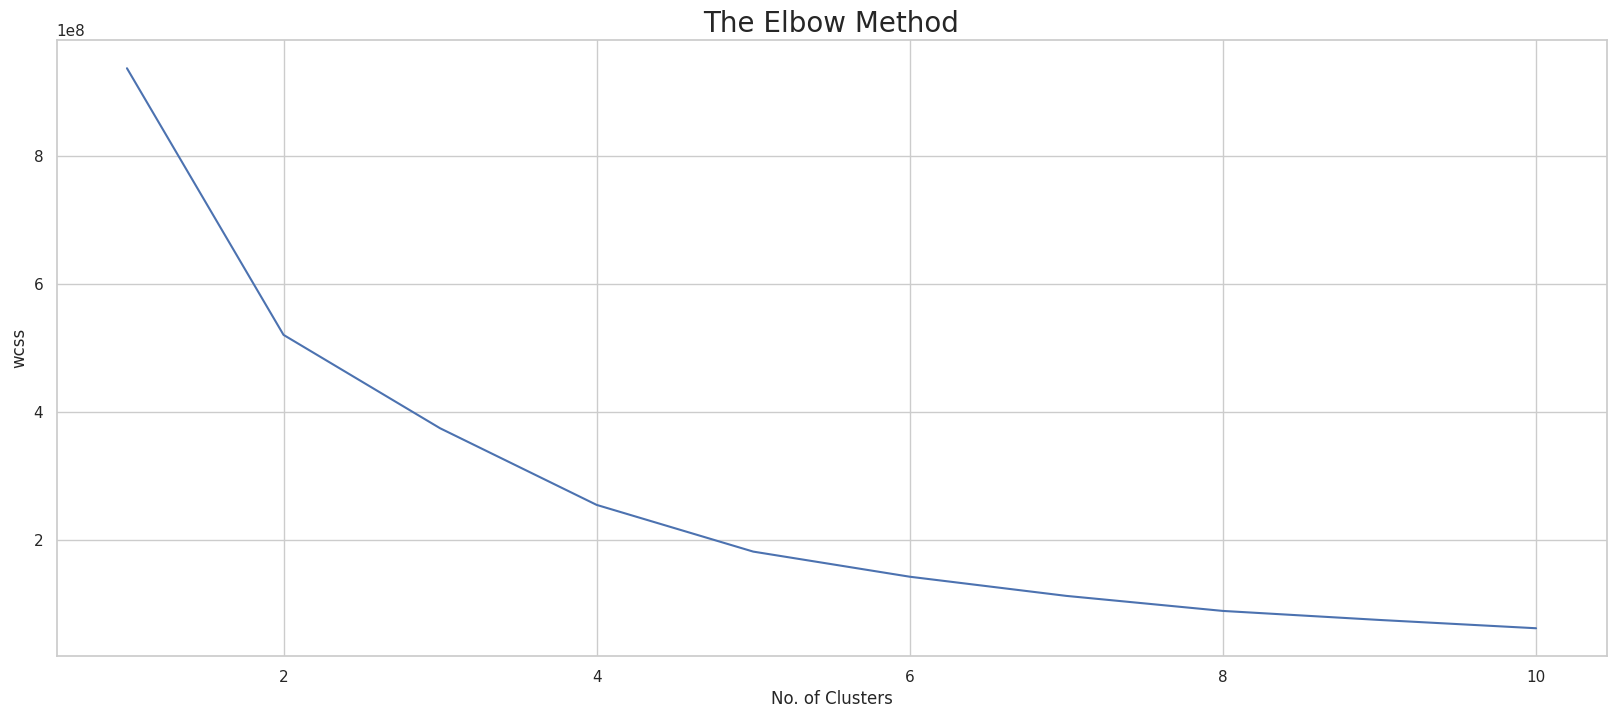

In [35]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

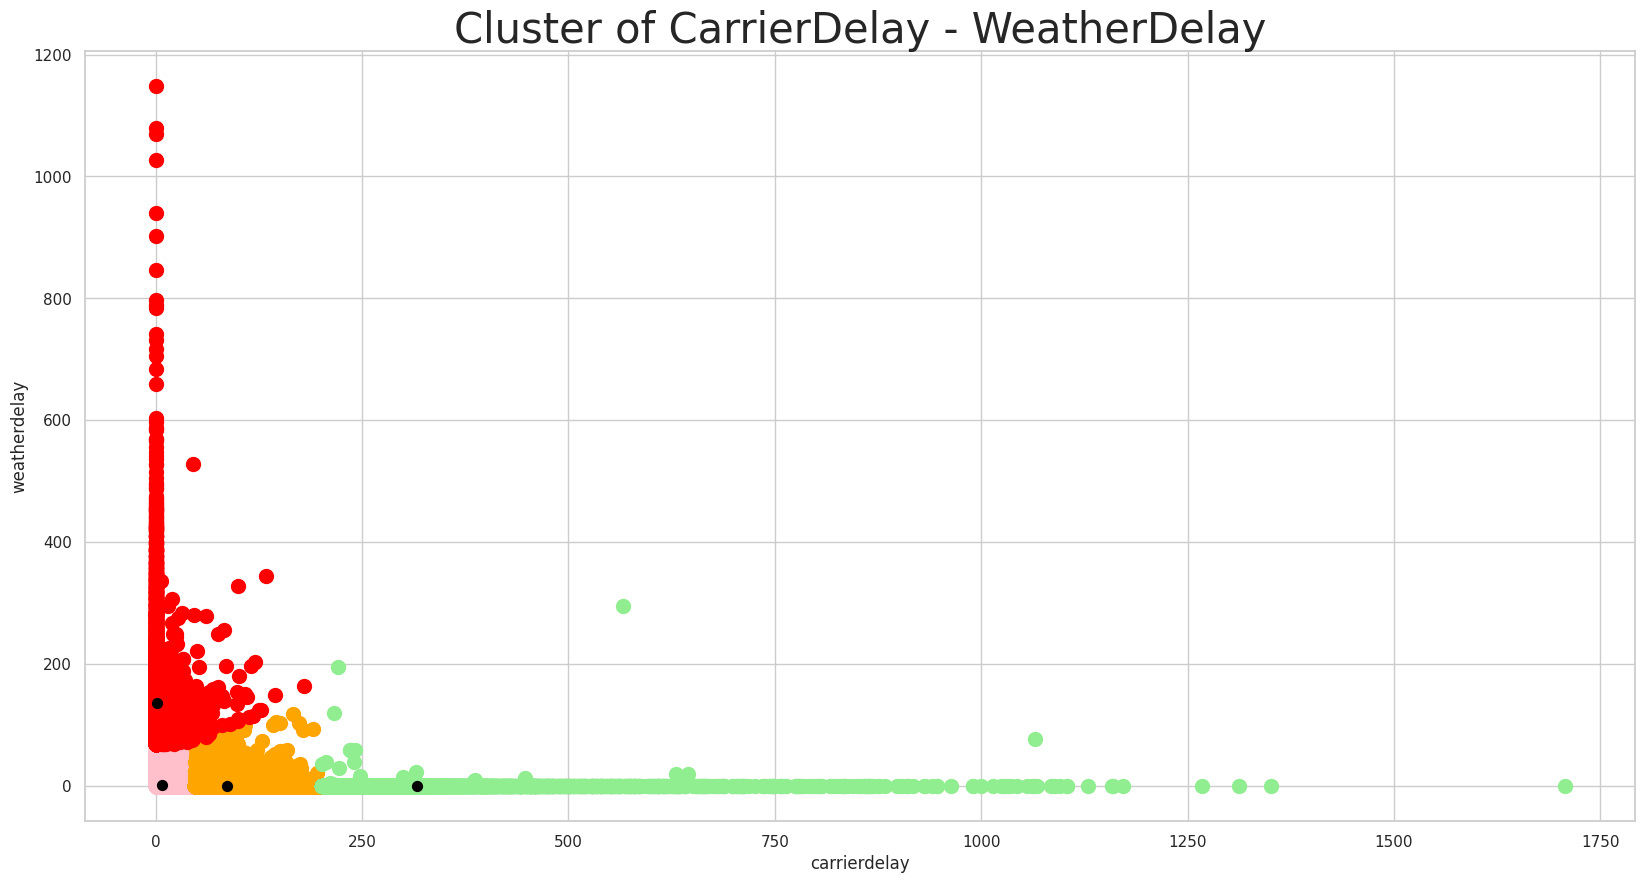

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(20,10))
plt.title('Cluster of CarrierDelay - WeatherDelay', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red')
plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'brown')
# plt.scatter(x[ymeans == 5, 0], x[ymeans == 5, 1], s = 100, c = 'purple')
# plt.scatter(x[ymeans == 6, 0], x[ymeans == 6, 1], s = 100, c = 'brown')
# plt.scatter(x[ymeans == 7, 0], x[ymeans == 7, 1], s = 100, c = 'blue')
# plt.scatter(x[ymeans == 8, 0], x[ymeans == 8, 1], s = 100, c = 'grey')
# plt.scatter(x[ymeans == 9, 0], x[ymeans == 9, 1], s = 100, c = 'green')
# plt.scatter(x[ymeans == 10, 0], x[ymeans == 10, 1], s = 100, c = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('carrierdelay')
plt.ylabel('weatherdelay')
plt.show()

In [37]:
from collections import Counter
Counter(ymeans)

Counter({0: 428345, 2: 3385, 1: 46168, 3: 6653})

##### Confusion matrix

### carrier delay  | total delay

In [38]:
x = balanced_data.loc[:,['arrdelay', 'airtime']].values

Text(0, 0.5, 'wcss')

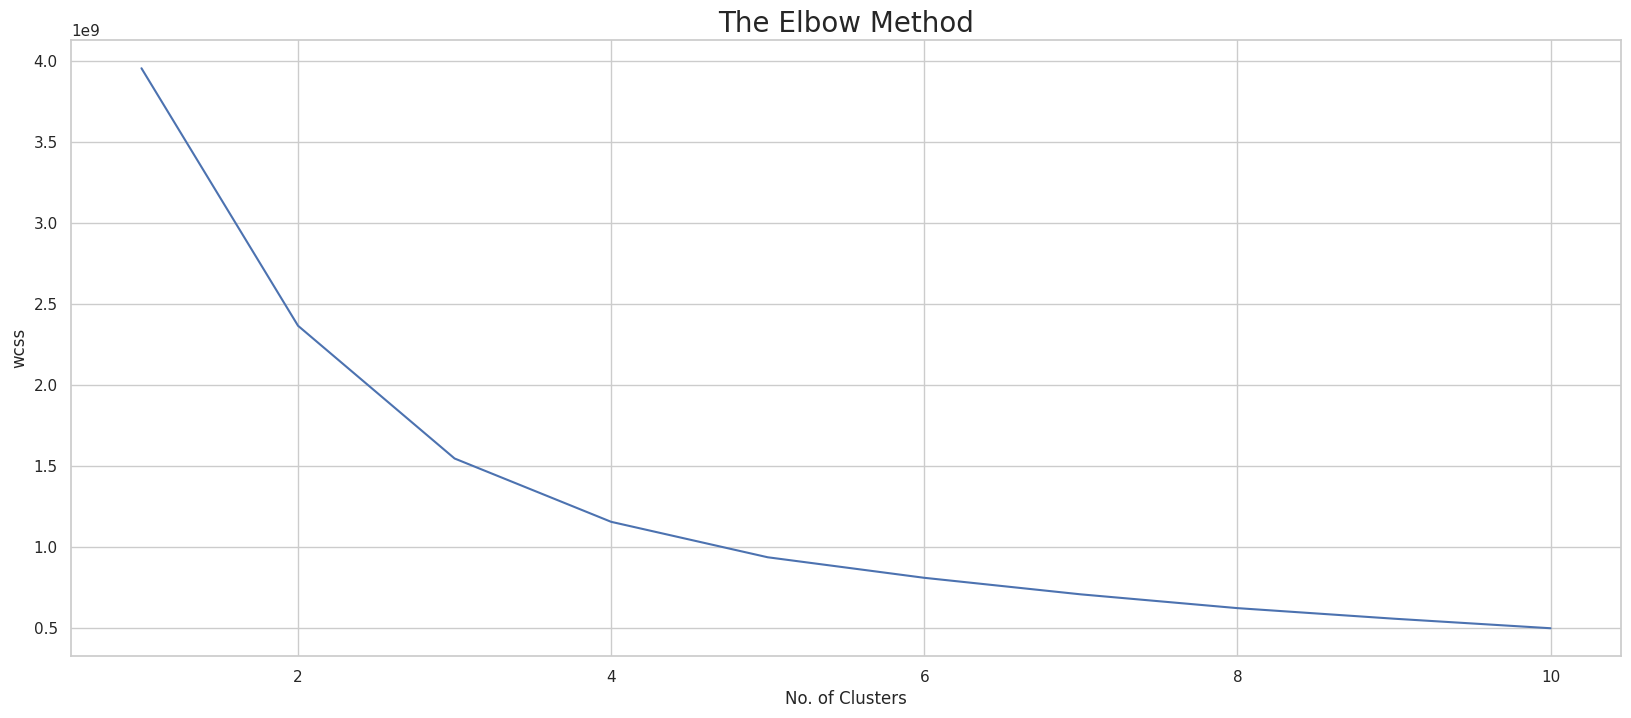

In [39]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(20,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

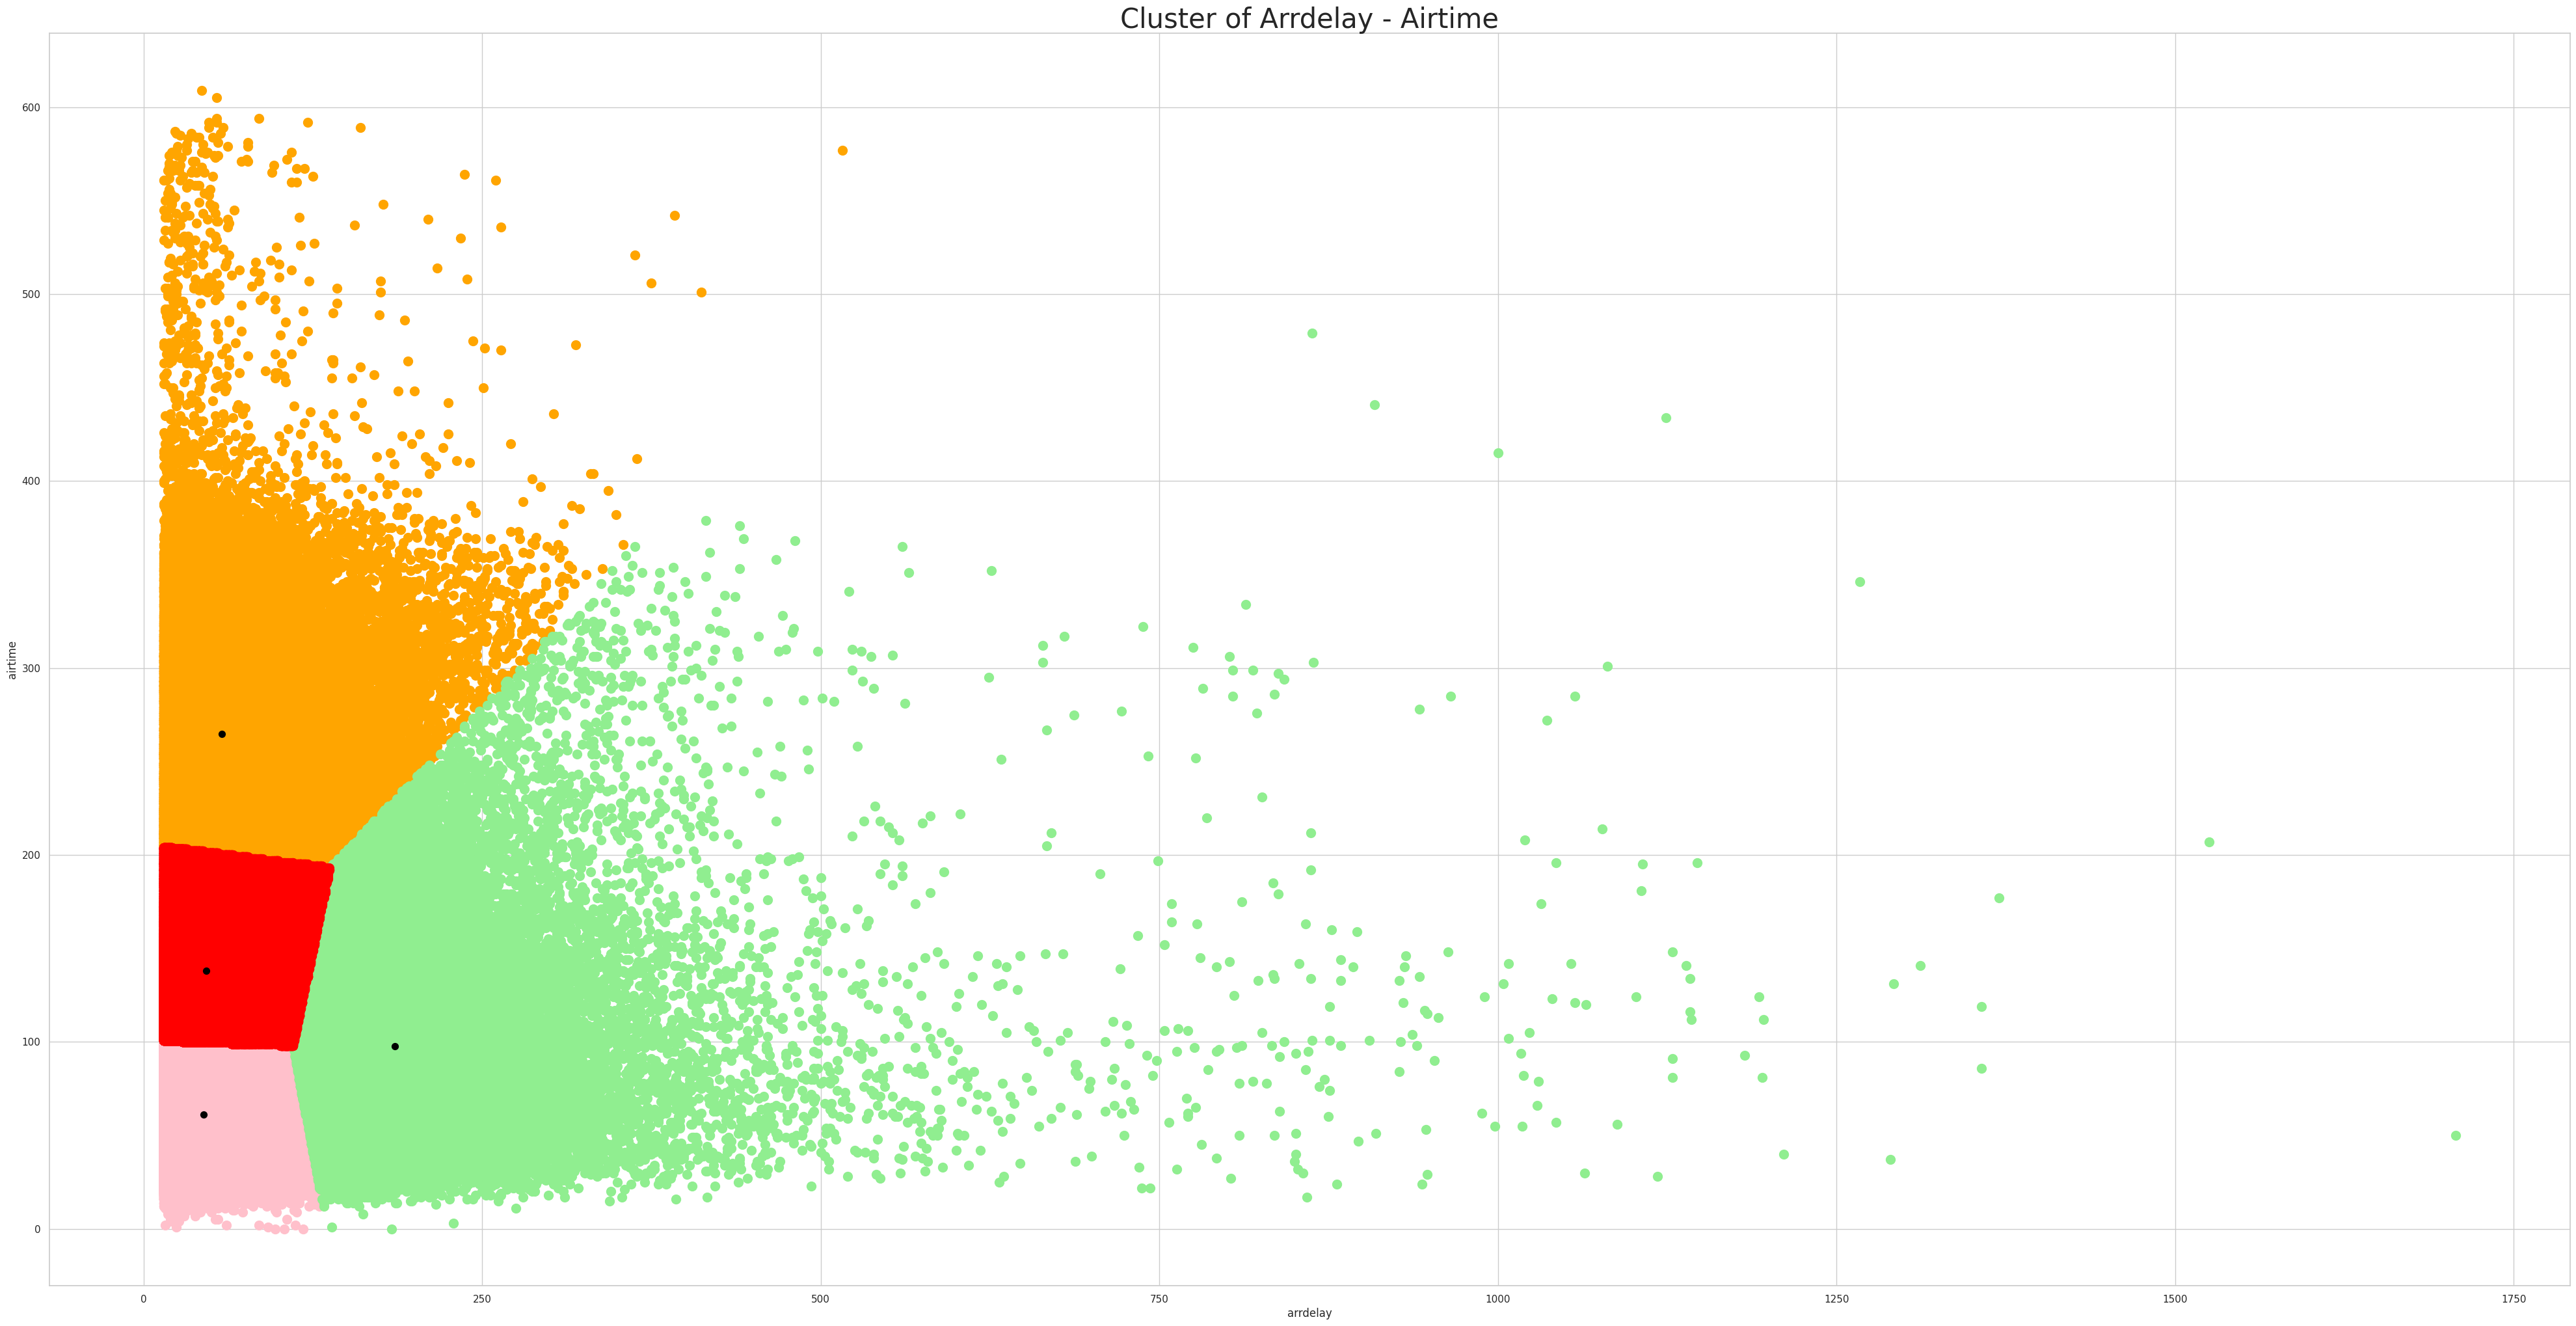

In [40]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(50,25))
plt.title('Cluster of Arrdelay - Airtime', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red')
# plt.scatter(x[ymeans == 4, 0], x[ymeans == 4, 1], s = 100, c = 'yellow')
# plt.scatter(x[ymeans == 5, 0], x[ymeans == 5, 1], s = 100, c = 'purple')
# plt.scatter(x[ymeans == 6, 0], x[ymeans == 6, 1], s = 100, c = 'brown')
# plt.scatter(x[ymeans == 7, 0], x[ymeans == 7, 1], s = 100, c = 'blue')
# plt.scatter(x[ymeans == 8, 0], x[ymeans == 8, 1], s = 100, c = 'grey')
# plt.scatter(x[ymeans == 9, 0], x[ymeans == 9, 1], s = 100, c = 'green')
# plt.scatter(x[ymeans == 10, 0], x[ymeans == 10, 1], s = 100, c = 'black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('arrdelay')
plt.ylabel('airtime')
plt.show()

In [41]:
from collections import Counter
Counter(ymeans)

Counter({0: 242474, 1: 51706, 3: 140540, 2: 49831})

### cluster all

In [42]:
pd.set_option('display.max_columns', None)
balanced_data.head()

deptime  airtime  crsarrtime  actualelapsedtime  crselapsedtime  depdelay  \
0     1829       77        1925                 90              90        34   
1     1937      230        1940                240             250        67   
2     1644      107        1725                121             135        94   
3     1452      213        1625                228             240        27   
4     1323      110        1510                123             135        28   

   distance  taxiIn  taxiOut  carrierdelay  weatherdelay  nasdelay  \
0       515       3       10             2             0         0   
1      1591       3        7            10             0         0   
2       828       6        8             8             0         0   
3      1489       7        8             3             0         0   
4       838       4        9             0             0         0   

   securitydelay  lateaircraftdelay  arrdelay  
0              0                 32        34  
1              0                 47        57  
2              0                 72        80  
3              0                 12        15  
4              0                 16        16

In [82]:
balanced_data.dtypes

deptime              int64
airtime              int64
crsarrtime           int64
actualelapsedtime    int64
crselapsedtime       int64
depdelay             int64
distance             int64
taxiIn               int64
taxiOut              int64
carrierdelay         int64
weatherdelay         int64
nasdelay             int64
securitydelay        int64
lateaircraftdelay    int64
arrdelay             int64
dtype: object

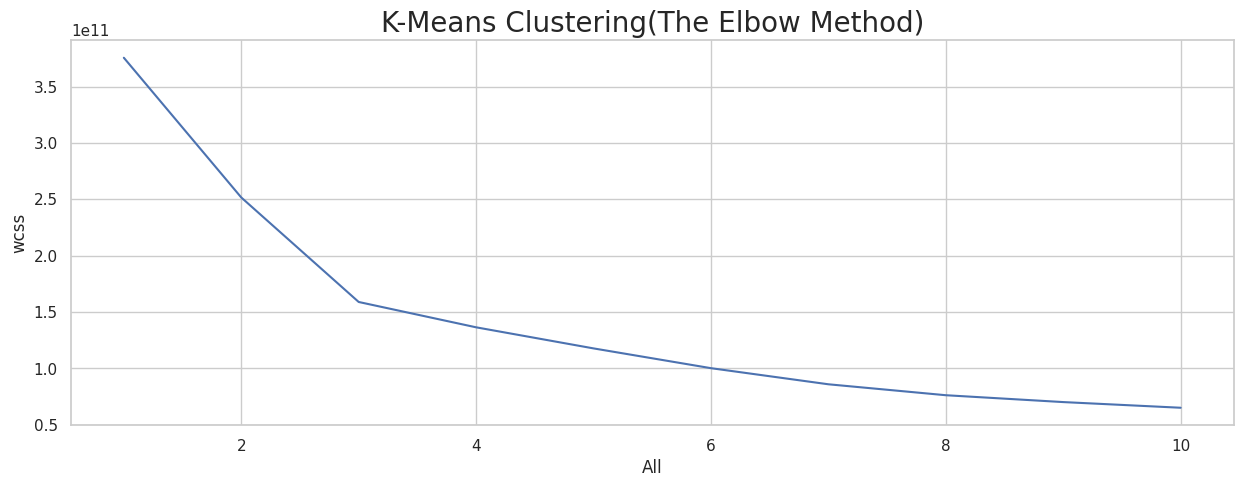

In [93]:
#clusterall
x = balanced_data.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)
#pca.inverse_transform
#i grafici vengono sovrapposti perche io faccio clustering su tutte le dimensioni che ci sono, però poi faccio il 
# plot solamente lungo le due dimensioni di massima variazione, quindi ci sta che i grafici siano sovrapposti


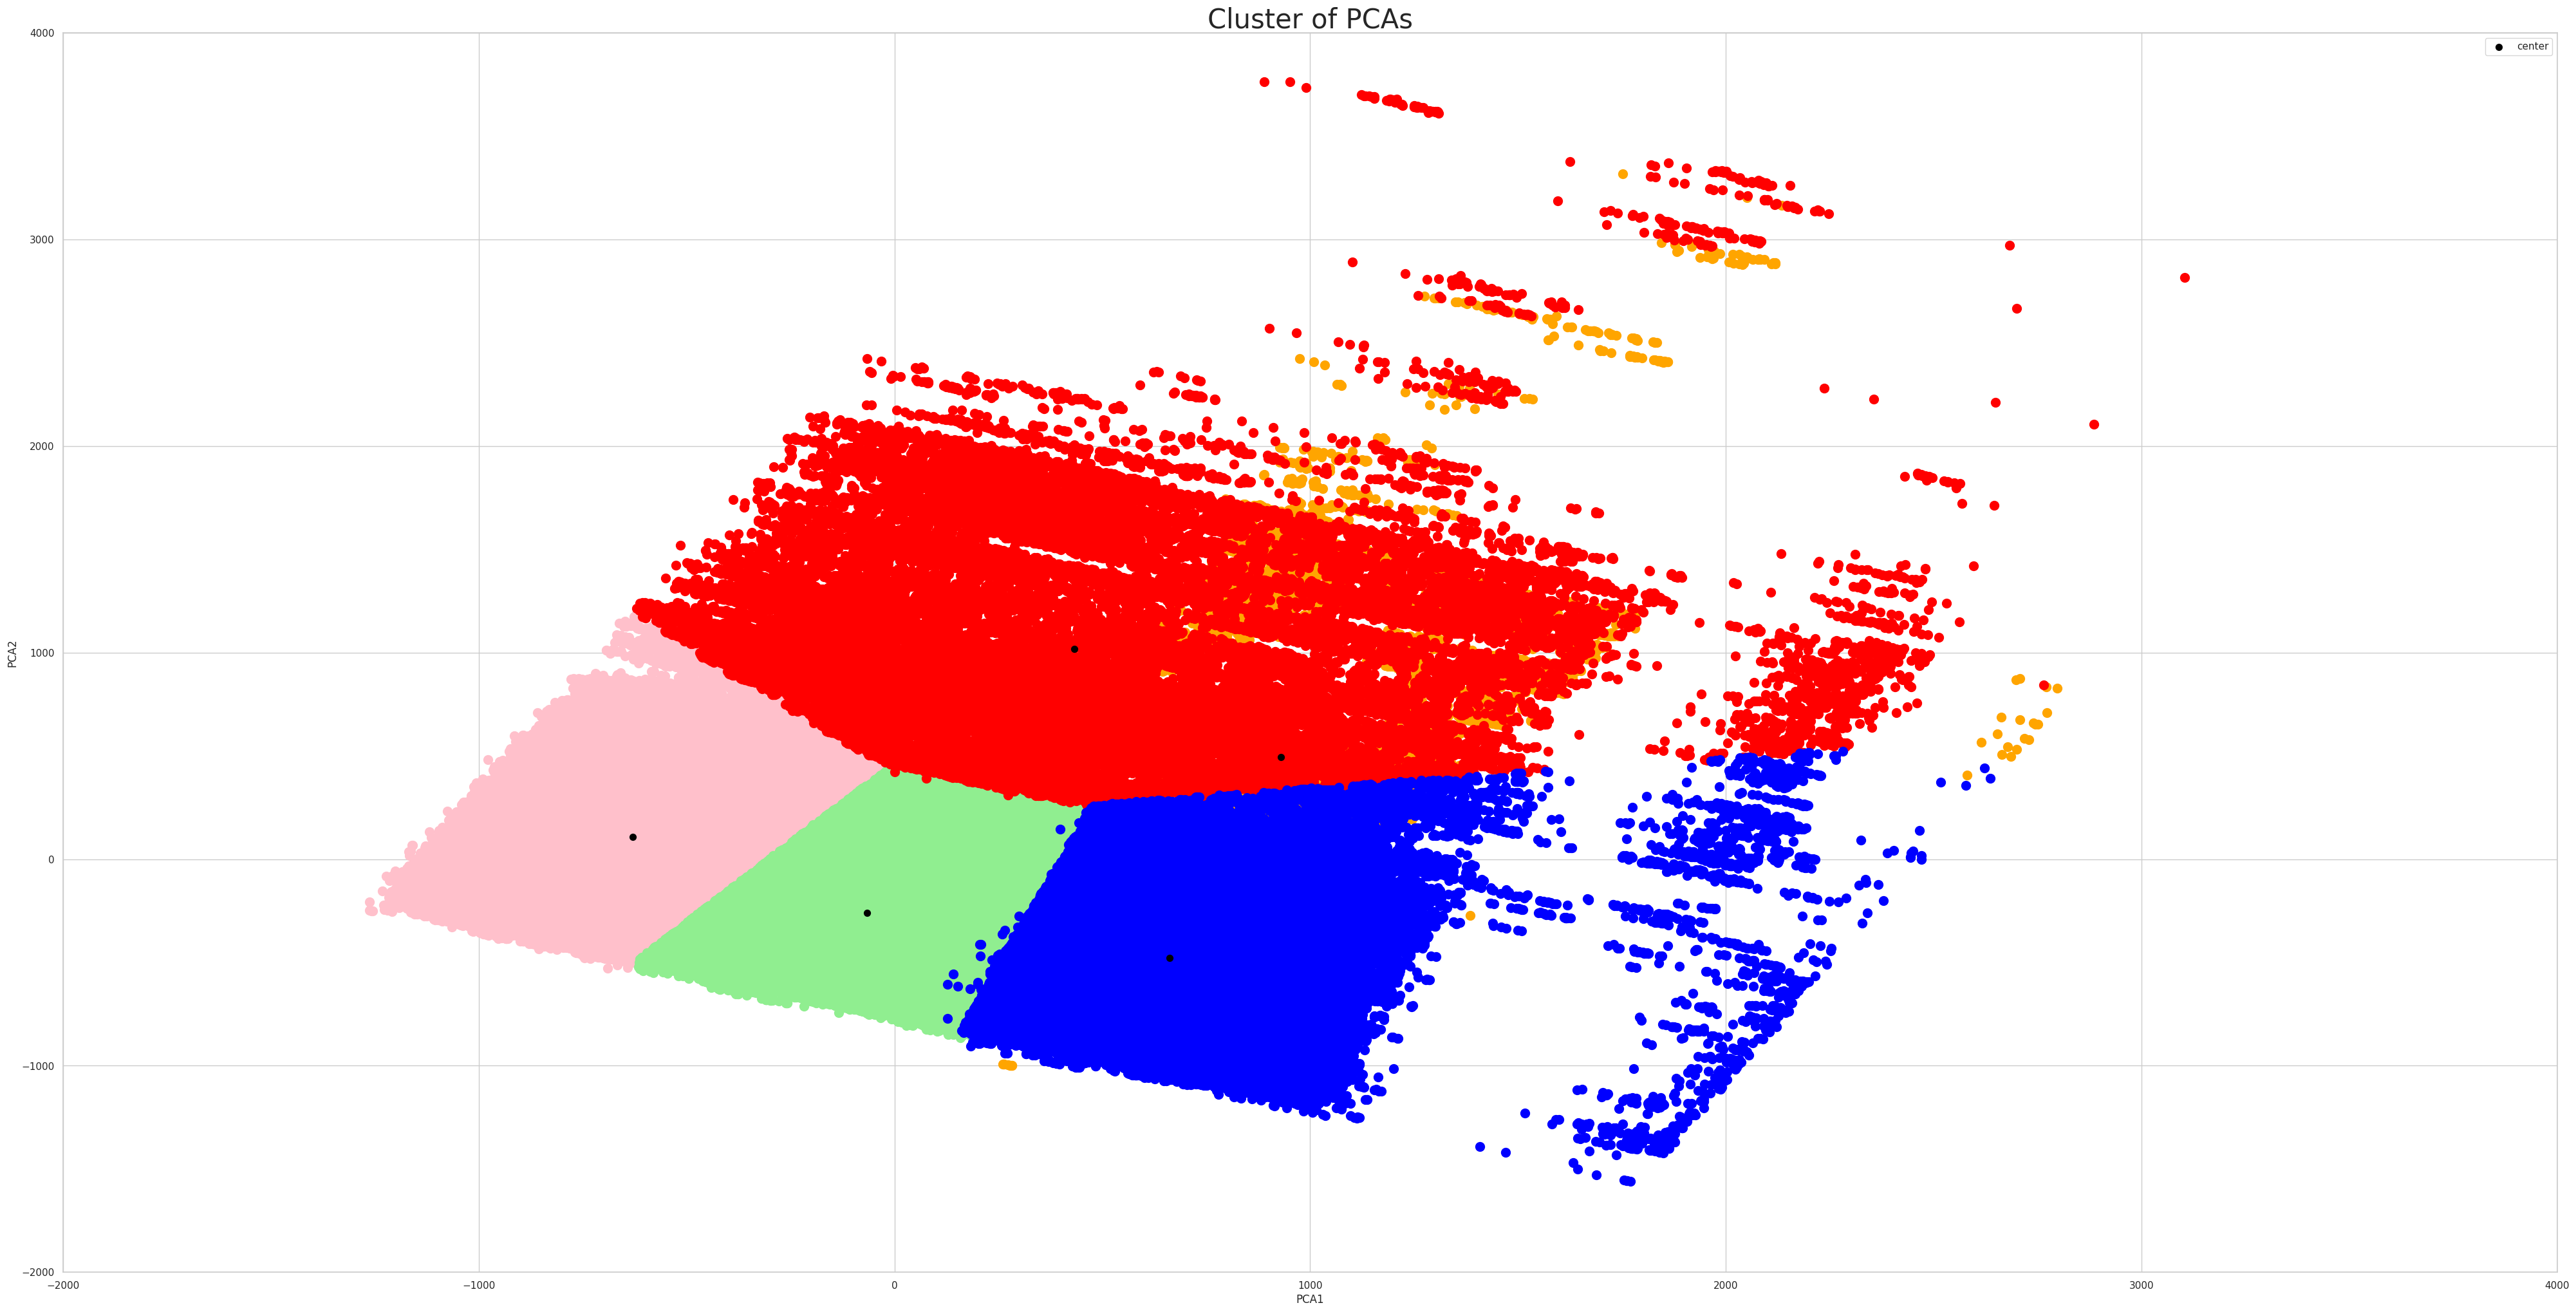

In [95]:
#cluster su x (spazio a 15 dim)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(50,25))
plt.title('Cluster of PCAs', fontsize = 30)


plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'red')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'brown')

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlim([-2000,4000])
plt.ylim([-2000,4000])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [96]:
#vedo quello che ho clusterizzato a 15 dimensioni, però proiettato nelle due dimensioni della pca
centroidi_15=kmeans.cluster_centers_

In [97]:
centroidi_15[0]
#valore medio delle feature per gli elementi di cluster 0

array([2.00617606e+03, 9.00405110e+01, 2.08679294e+03, 1.15023317e+02,
       1.13282807e+02, 6.36823283e+01, 6.02093989e+02, 6.53039282e+00,
       1.84524135e+01, 1.45440981e+01, 3.13290217e+00, 1.27543430e+01,
       5.44390902e-02, 3.49371073e+01, 6.54228896e+01])

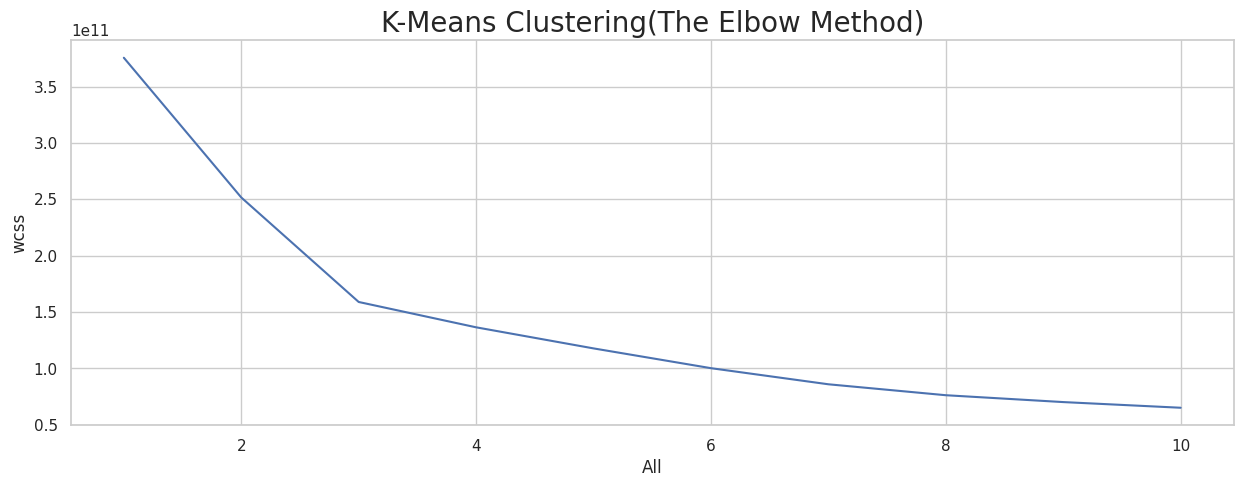

In [98]:
#spazio a 15 dim -> clustering -> pca 2 dim-> visualizzazione a 2 dim
#spaziona 15 dim ->pca 2 dim -> clustering -> antitrasf pca ->interpretazione del risultato
x = balanced_data.values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('All')
plt.ylabel('wcss')
plt.show()

In [99]:
pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)
#pca.inverse_transform
#i grafici vengono sovrapposti perche io faccio clustering su tutte le dimensioni che ci sono, però poi faccio il 
# plot solamente lungo le due dimensioni di massima variazione, quindi ci sta che i grafici siano sovrapposti

In [101]:

from sklearn.decomposition import PCA



kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(pca_x)
centroidi_2=kmeans.cluster_centers_
plt.figure(figsize=(50,25))
plt.title('Cluster of PCAs', fontsize = 30)


plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'red')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'brown')

plt.scatter(centroidi_2[:, 0], centroidi_2[:, 1], s = 50, c = 'black', label="center")

plt.xlim([-2000,4000])
plt.ylim([-2000,4000])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [105]:
antitrasf=pca.inverse_transform(centroidi_2)
print(antitrasf[0],"\n",centroidi_15[0])

#abbiamo fatto la trasformata e clusterizzato nello spazio a 2 dimensioni
#antitrasformata dei centroidi -> utile perchè dato un centroide riesco a vedere come sono fatti i punti del cluster
#da questo studio, vediamo che le feature sono simili dopo l'antitrasformazione nella seconda variante | cluster 0

[1.52156525e+03 7.09100852e+01 1.58258981e+03 9.57959875e+01
 9.23004312e+01 5.59219074e+01 4.35834858e+02 6.52032957e+00
 1.83655728e+01 1.68395795e+01 3.49950467e+00 1.31363433e+01
 8.52848702e-02 2.58567622e+01 5.94174745e+01] 
 [2.00617606e+03 9.00405110e+01 2.08679294e+03 1.15023317e+02
 1.13282807e+02 6.36823283e+01 6.02093989e+02 6.53039282e+00
 1.84524135e+01 1.45440981e+01 3.13290217e+00 1.27543430e+01
 5.44390902e-02 3.49371073e+01 6.54228896e+01]


#### DBSCAN

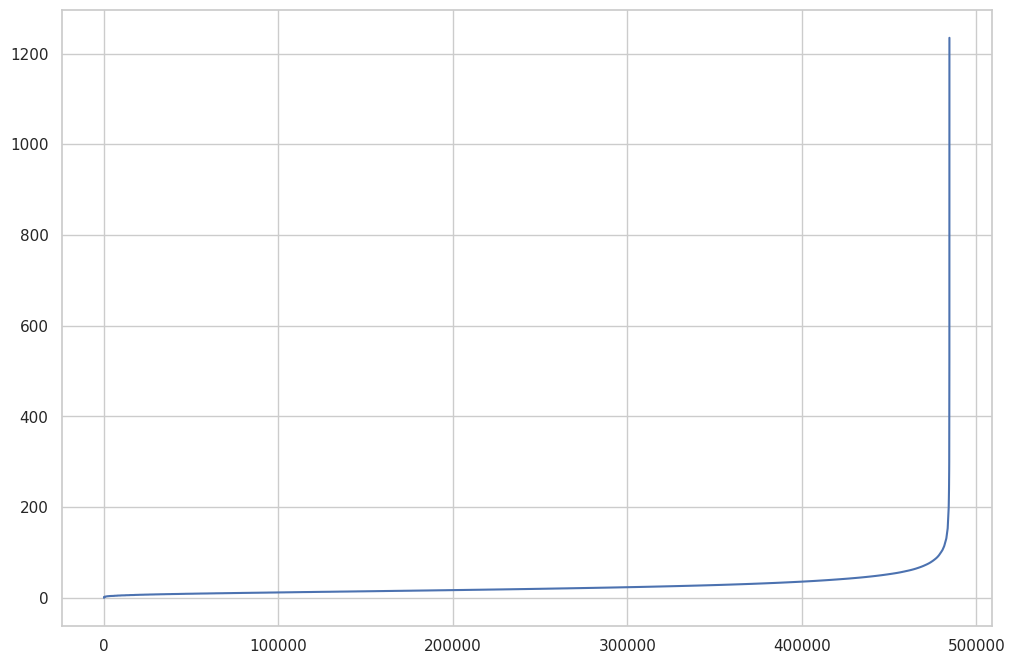

In [106]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

#x = balanced_data.drop(["uniquecarrierid"], axis=1).values
x = balanced_data.values
neigh = NearestNeighbors(n_neighbors=2, n_jobs=-1, algorithm='ball_tree', leaf_size=5)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])

In [107]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=150, min_samples=151, algorithm="ball_tree", n_jobs=-1).fit(x) #Scegli distanza
ymeans = db.labels_

: 

: 

In [ ]:
list(set(db.labels_))

[0, 1, 2, 3, 4, 5, 6, 7, -1]

In [30]:
plt.figure(figsize=(100,50))
plt.title('Cluster of PCAs', fontsize = 30)

plt.scatter(pca_x[ymeans == -1, 0], pca_x[ymeans == -1, 1], s = 100, c = 'black')
plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'pink')
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'orange')
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'lightgreen')
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'blue')
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'gray')
plt.scatter(pca_x[ymeans == 5, 0], pca_x[ymeans == 5, 1], s = 100, c = 'red')
plt.scatter(pca_x[ymeans == 6, 0], pca_x[ymeans == 6, 1], s = 100, c = 'red')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


##### yellowbricks and silhouette


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


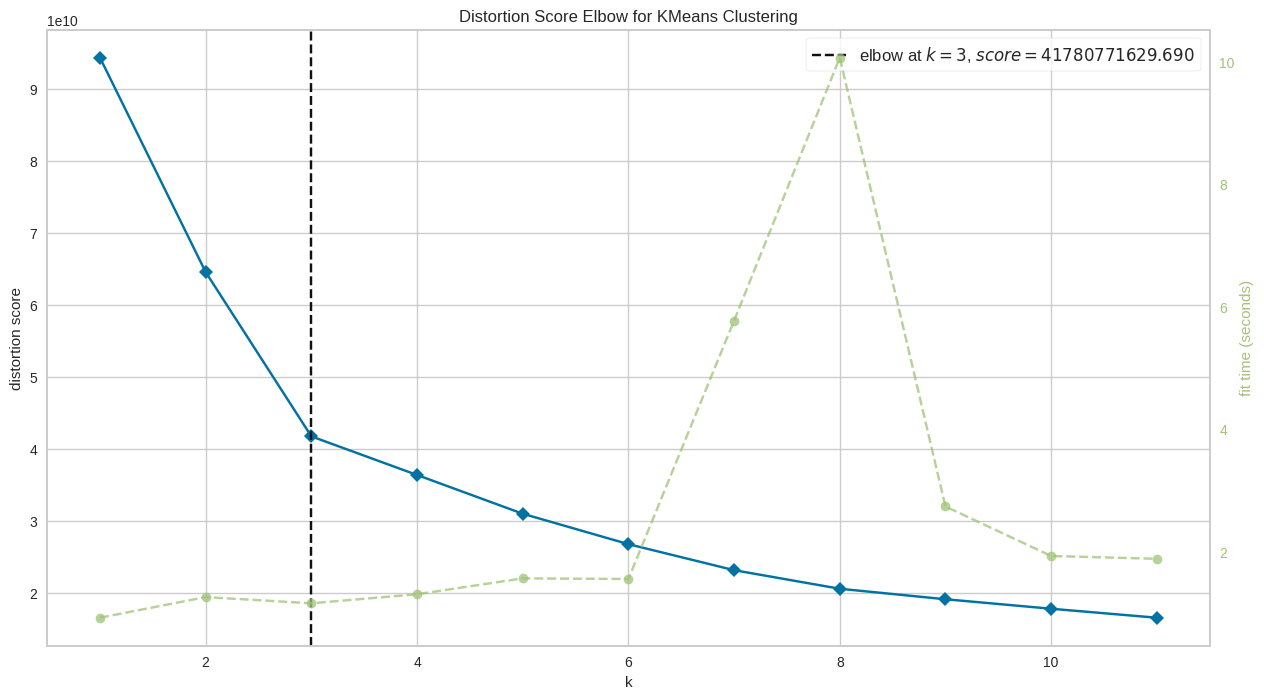

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

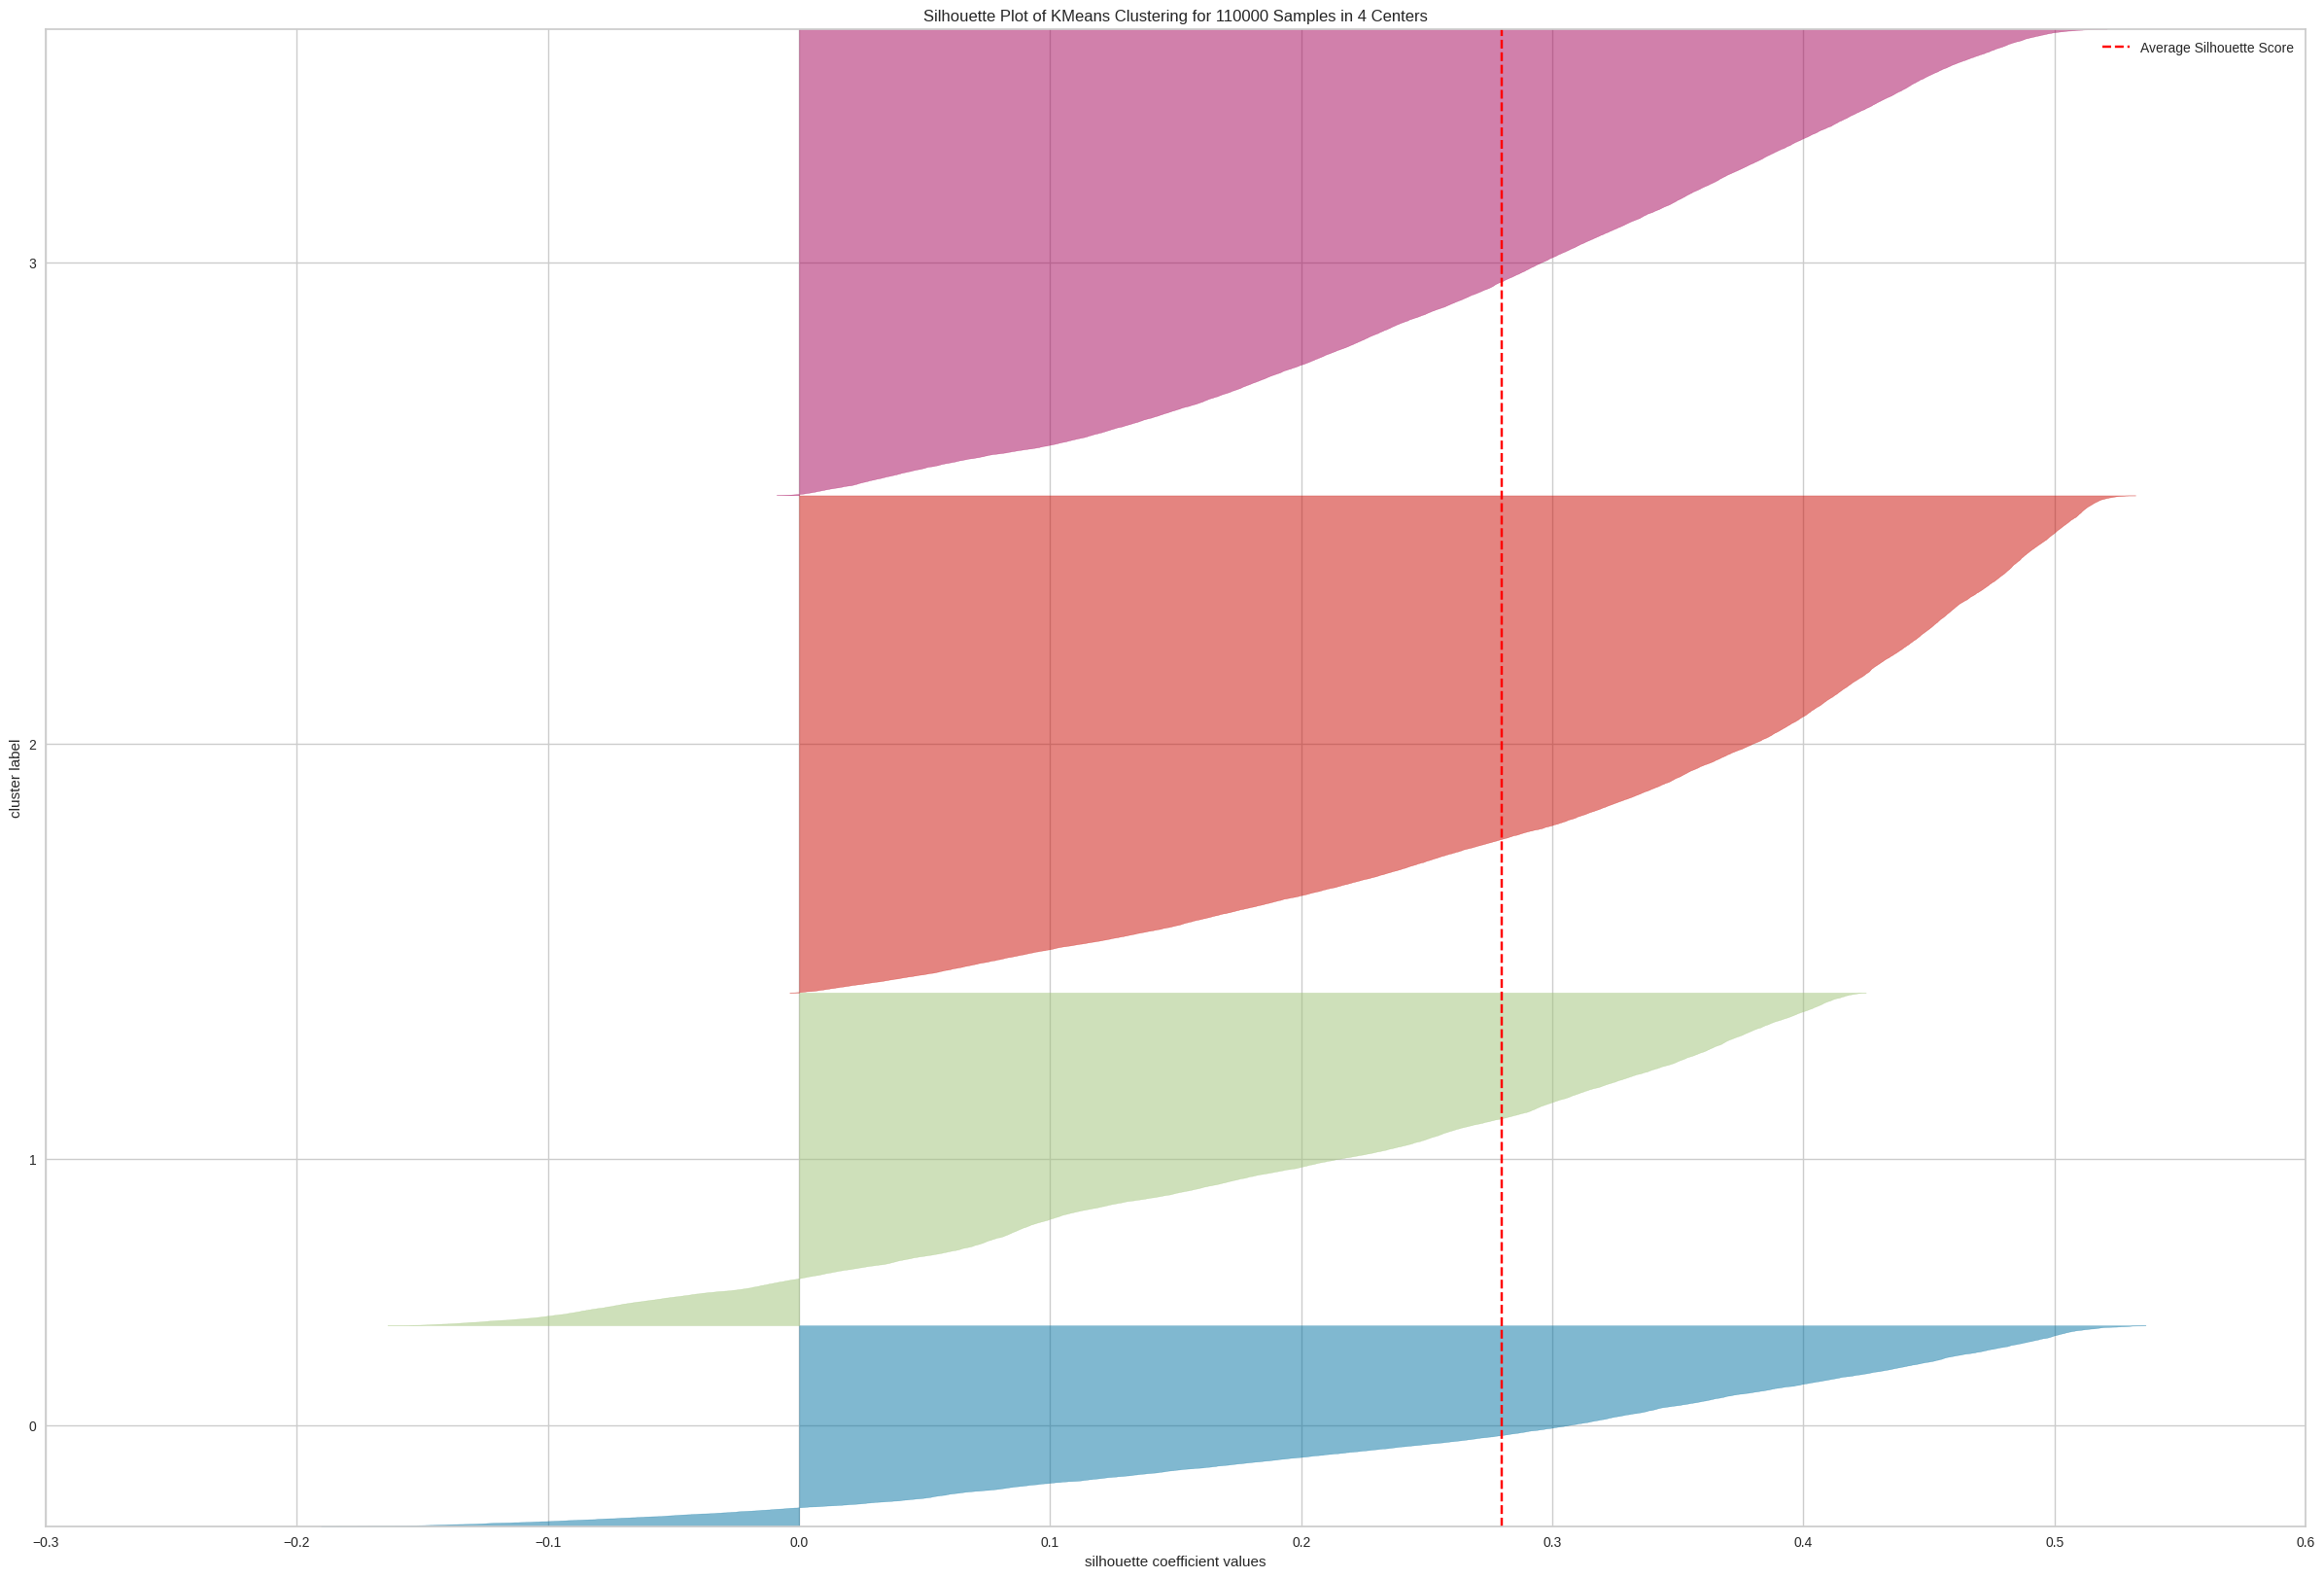

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 110000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

#questa silhouette viene fuori con la x che contiene balanced data filtrato weatherdelay e carrierdelay
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(30,20))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
x = balanced_data.loc[:,['carrierdelay', 'weatherdelay']].values

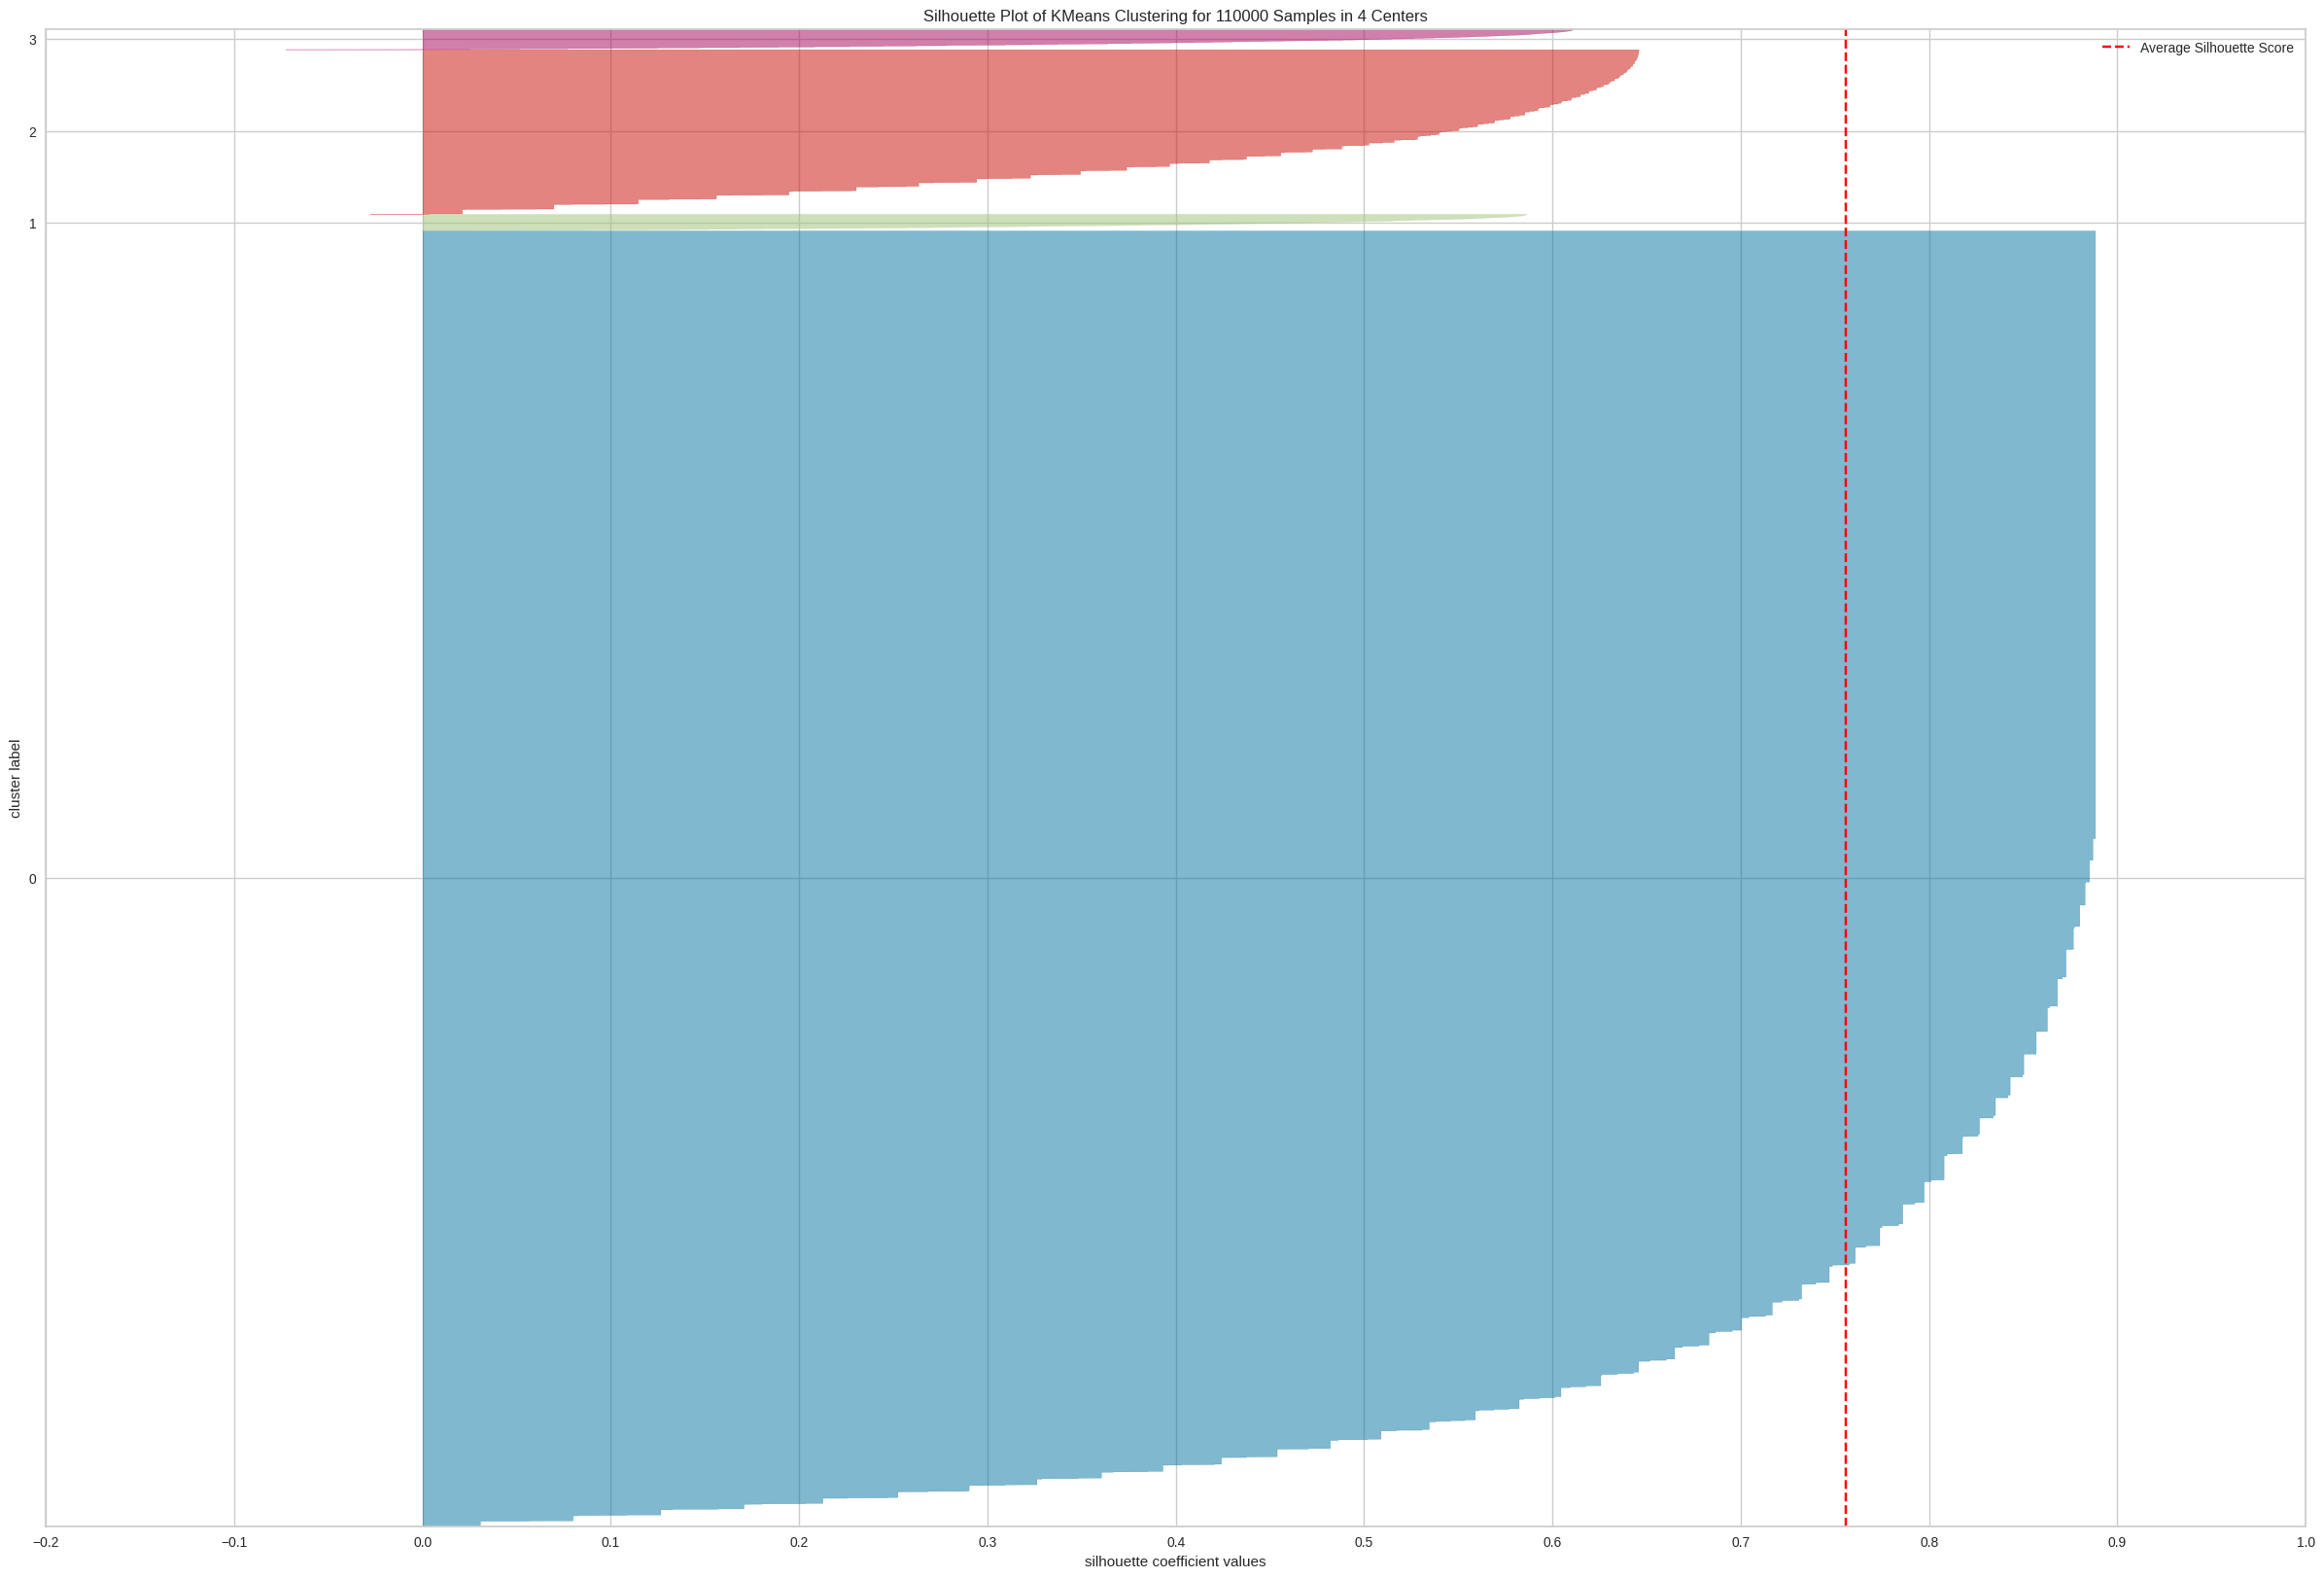

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 110000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

#questa silhouette viene fuori con la x che contiene balanced data filtrato weatherdelay e carrierdelay
# Instantiate the clustering model and visualizer
model = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(30,20))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure